In [2]:
import pandas as pd
import glob
import re
import matplotlib.pyplot as plt

In [4]:
data_dir = "/scratch/s194101/finetune_logs_all/mmidb_noica_noica_5.0_nogroups/"
# data_dir = "/scratch/s194101/finetune_logs_all/mmidb_noica_noica_5.0_splits10_repeat5/"
# data_dir = "/scratch/s194101/finetune_logs_all/mmidb_noica_noica_5.0_splits10_repeat2_nogroups/"
file = "version_10/metrics.csv"

df = pd.read_csv(data_dir + file)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4302 entries, 0 to 4301
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Fold_7_Repeat_0-acc        4284 non-null   float64
 1   Fold_7_Repeat_0-epoch      4302 non-null   int64  
 2   Fold_7_Repeat_0-loss       4284 non-null   float64
 3   Fold_7_Repeat_0-test_acc   1 non-null      float64
 4   Fold_7_Repeat_0-test_loss  1 non-null      float64
 5   Fold_7_Repeat_0-val_acc    17 non-null     float64
 6   Fold_7_Repeat_0-val_loss   17 non-null     float64
 7   step                       4302 non-null   int64  
dtypes: float64(6), int64(2)
memory usage: 269.0 KB


In [5]:
df.columns

Index(['Fold_7_Repeat_0-acc', 'Fold_7_Repeat_0-epoch', 'Fold_7_Repeat_0-loss',
       'Fold_7_Repeat_0-test_acc', 'Fold_7_Repeat_0-test_loss',
       'Fold_7_Repeat_0-val_acc', 'Fold_7_Repeat_0-val_loss', 'step'],
      dtype='object')

In [8]:
files = glob.glob(data_dir + "version_*/metrics.csv")
files.sort(key=lambda x: int(re.search(r'\/version_(\d+)\/metrics\.csv', x).group(1)))
files

['/scratch/s194101/finetune_logs_all/mmidb_noica_noica_5.0_nogroups/version_0/metrics.csv',
 '/scratch/s194101/finetune_logs_all/mmidb_noica_noica_5.0_nogroups/version_1/metrics.csv',
 '/scratch/s194101/finetune_logs_all/mmidb_noica_noica_5.0_nogroups/version_2/metrics.csv',
 '/scratch/s194101/finetune_logs_all/mmidb_noica_noica_5.0_nogroups/version_3/metrics.csv',
 '/scratch/s194101/finetune_logs_all/mmidb_noica_noica_5.0_nogroups/version_4/metrics.csv',
 '/scratch/s194101/finetune_logs_all/mmidb_noica_noica_5.0_nogroups/version_5/metrics.csv',
 '/scratch/s194101/finetune_logs_all/mmidb_noica_noica_5.0_nogroups/version_6/metrics.csv',
 '/scratch/s194101/finetune_logs_all/mmidb_noica_noica_5.0_nogroups/version_7/metrics.csv',
 '/scratch/s194101/finetune_logs_all/mmidb_noica_noica_5.0_nogroups/version_8/metrics.csv',
 '/scratch/s194101/finetune_logs_all/mmidb_noica_noica_5.0_nogroups/version_9/metrics.csv',
 '/scratch/s194101/finetune_logs_all/mmidb_noica_noica_5.0_nogroups/version_10/m

In [9]:
all_data = []

for file in files:
    df = pd.read_csv(file)
    all_data.append(df)

In [10]:
all_data[1].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3290 entries, 0 to 3289
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Fold_0_Repeat_0-acc        3276 non-null   float64
 1   Fold_0_Repeat_0-epoch      3290 non-null   int64  
 2   Fold_0_Repeat_0-loss       3276 non-null   float64
 3   Fold_0_Repeat_0-test_acc   1 non-null      float64
 4   Fold_0_Repeat_0-test_loss  1 non-null      float64
 5   Fold_0_Repeat_0-val_acc    13 non-null     float64
 6   Fold_0_Repeat_0-val_loss   13 non-null     float64
 7   step                       3290 non-null   int64  
dtypes: float64(6), int64(2)
memory usage: 205.8 KB


In [11]:
all_data[1][all_data[1]["Fold_0_Repeat_0-val_acc"].notna()]["Fold_0_Repeat_0-val_acc"]

252     0.755011
505     0.783964
758     0.806236
1011    0.788419
1264    0.783964
1517    0.806236
1770    0.795100
2023    0.797327
2276    0.804009
2529    0.799555
2782    0.792873
3035    0.799555
3288    0.783964
Name: Fold_0_Repeat_0-val_acc, dtype: float64

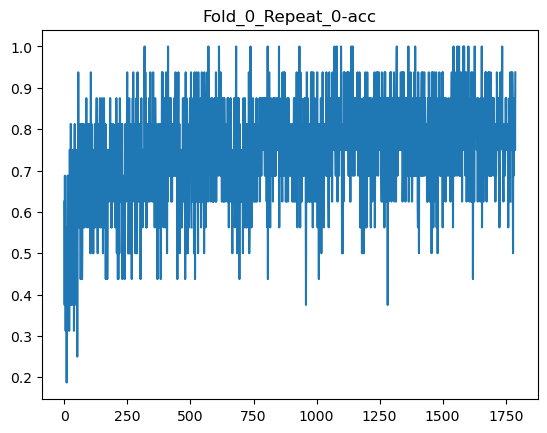

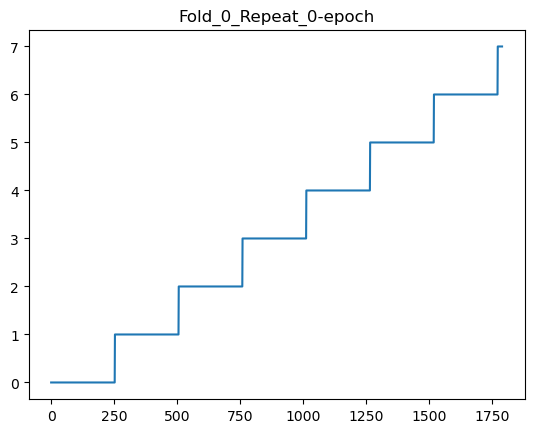

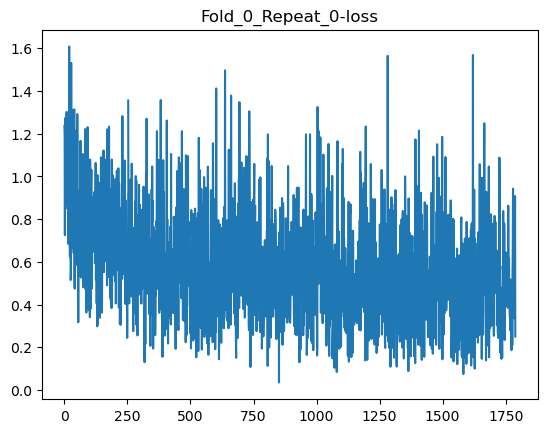

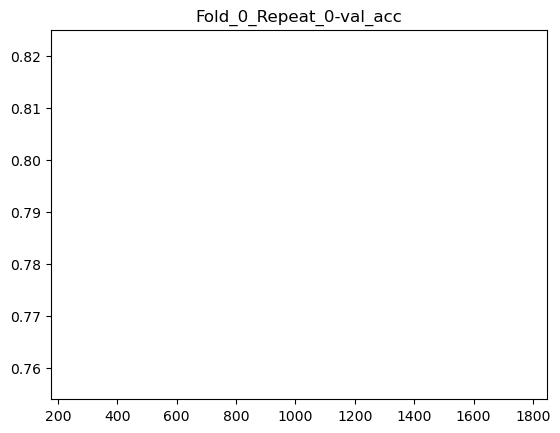

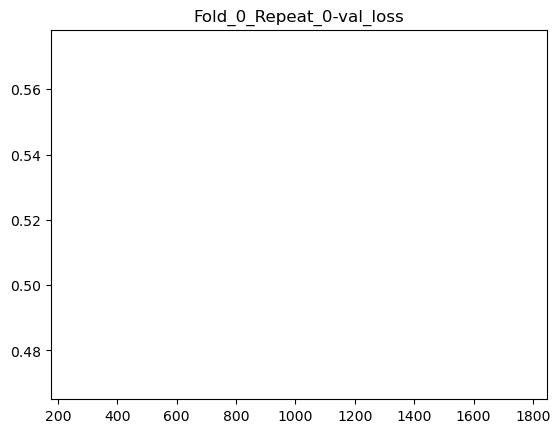

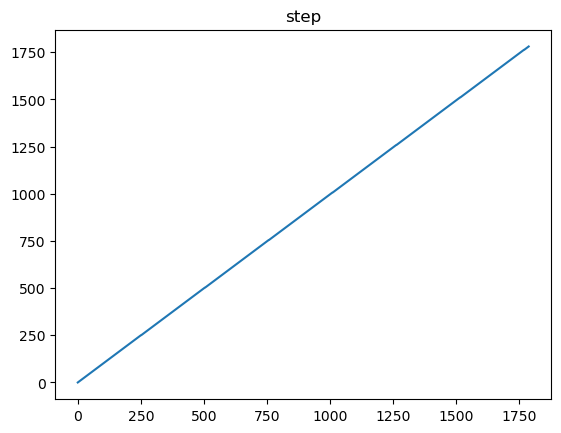

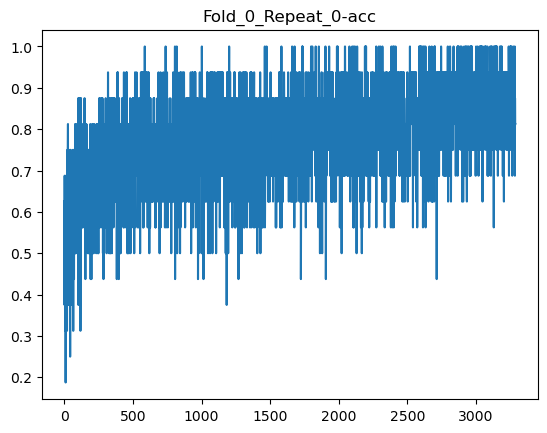

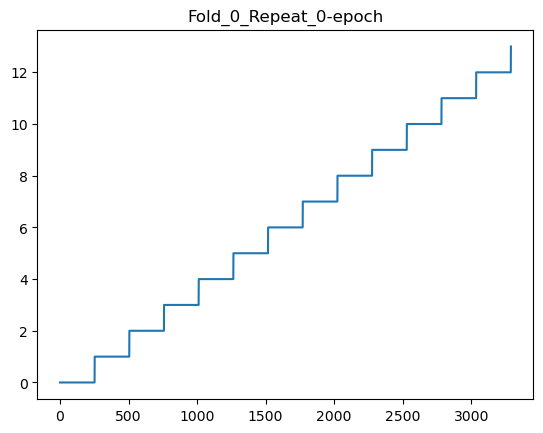

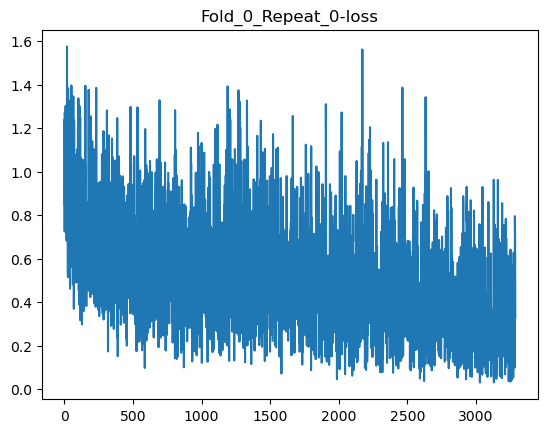

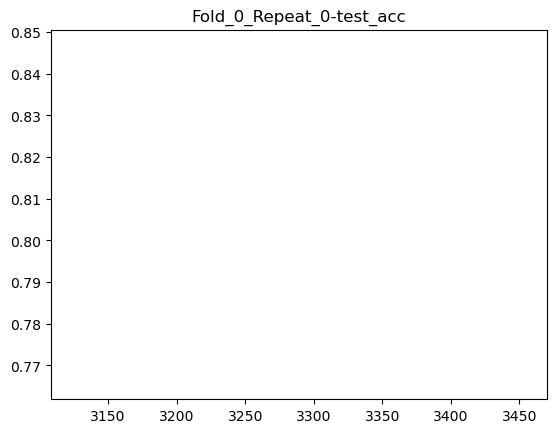

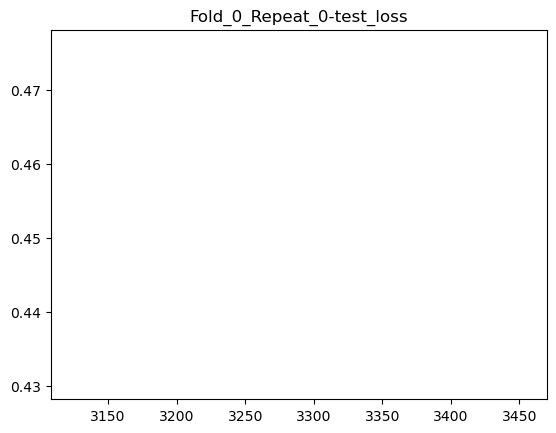

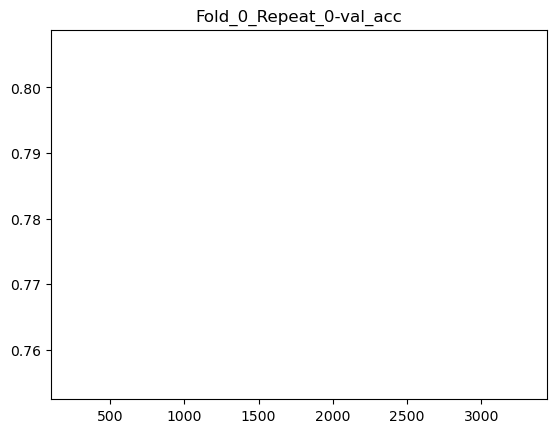

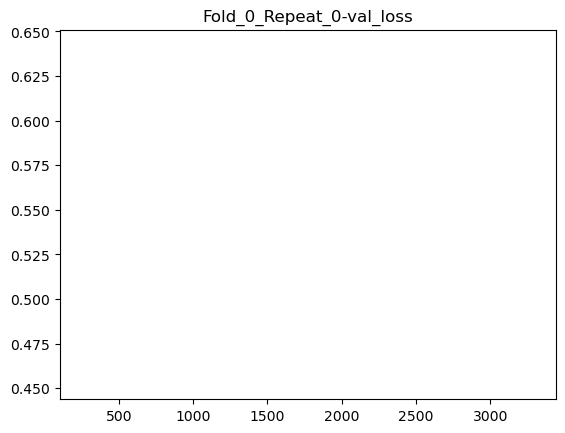

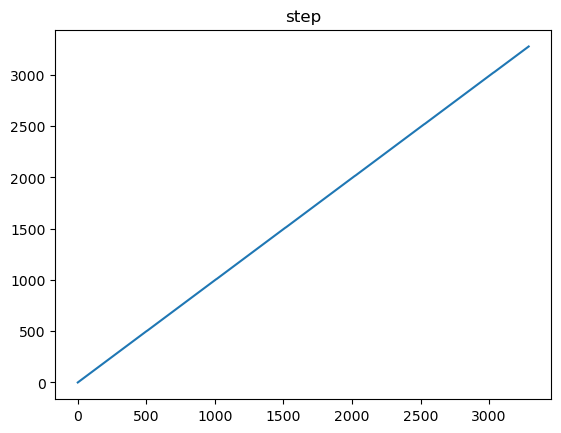

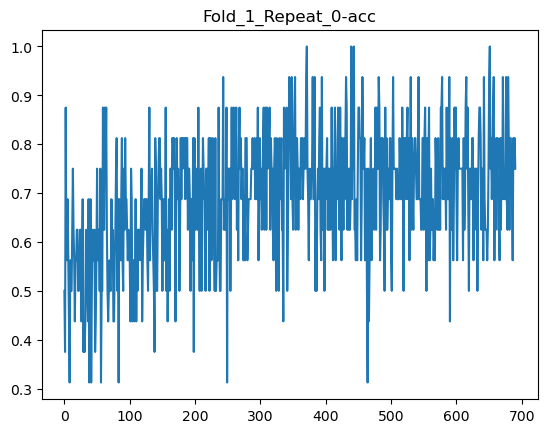

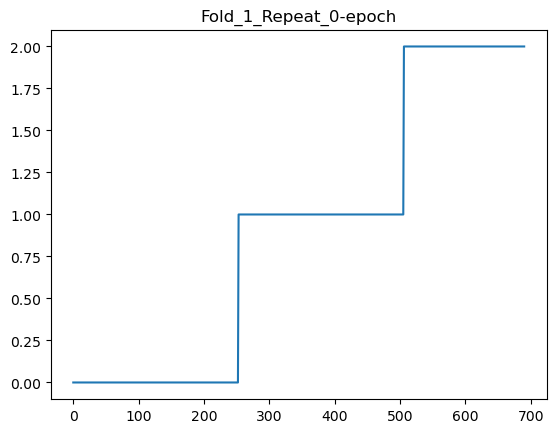

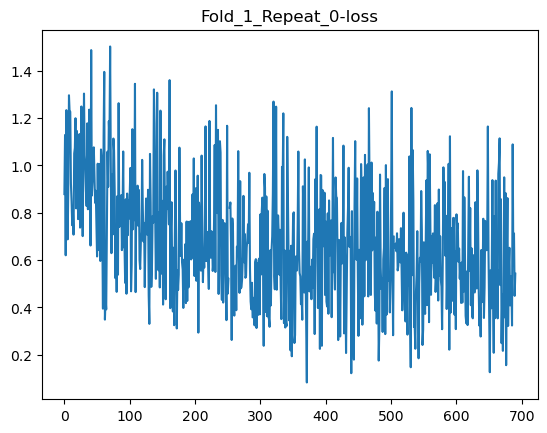

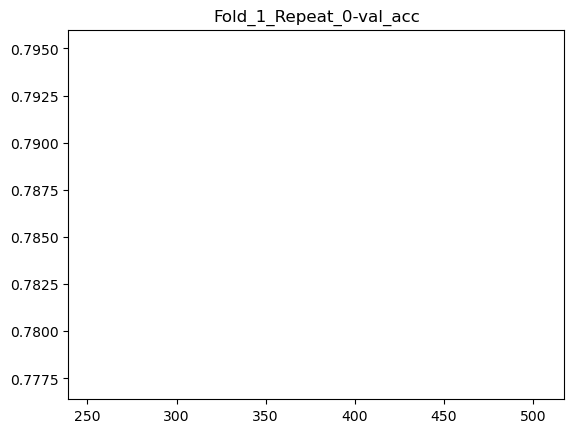

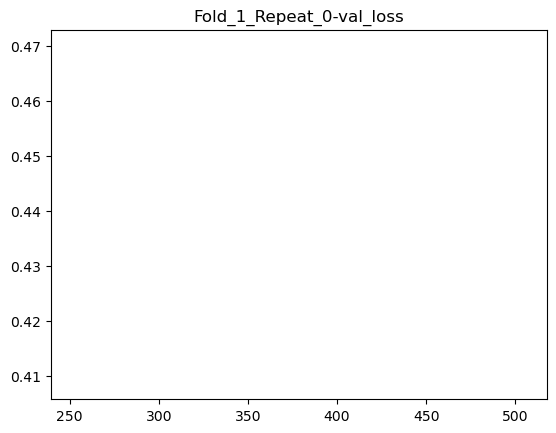

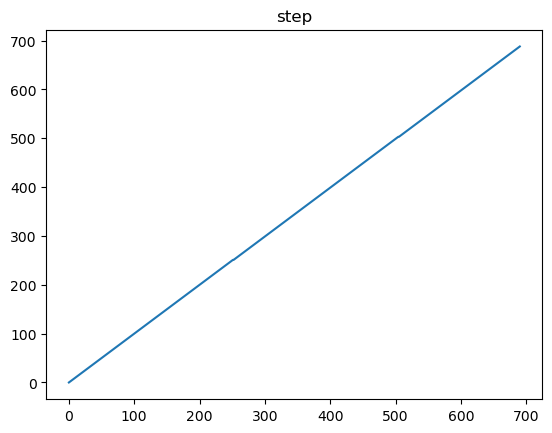

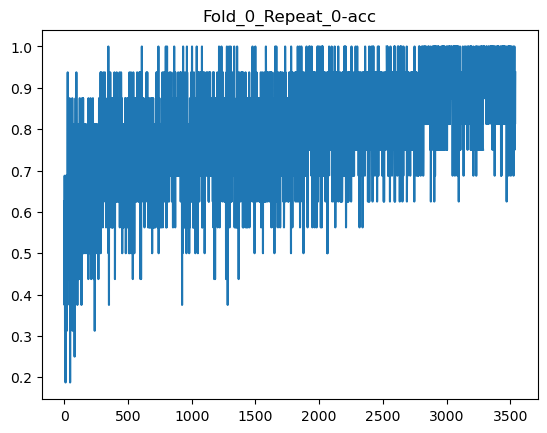

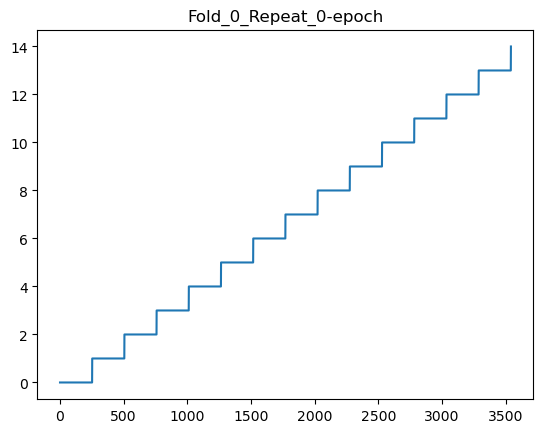

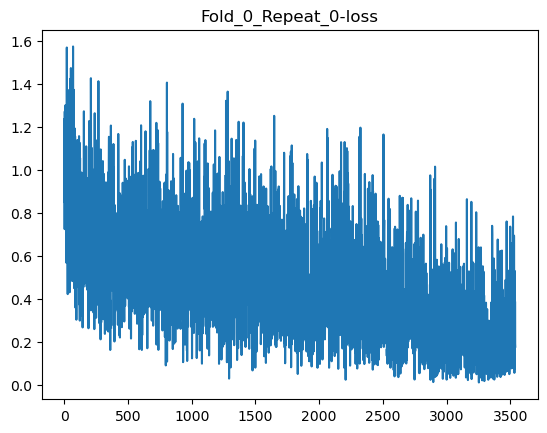

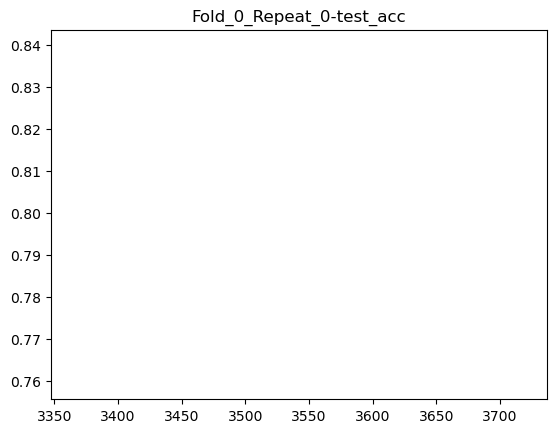

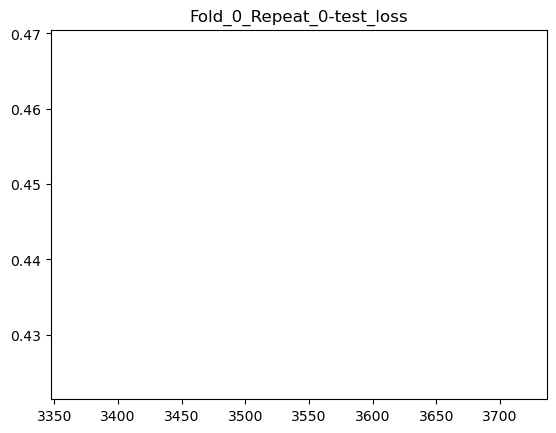

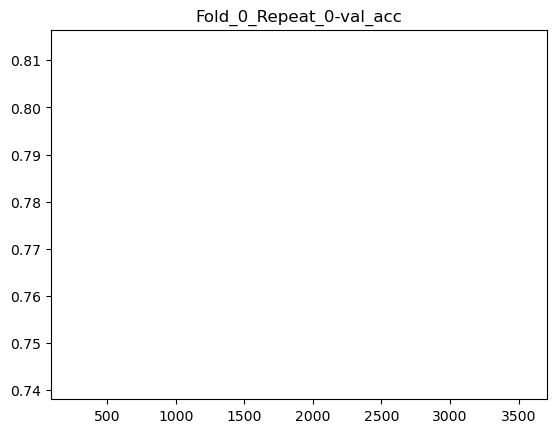

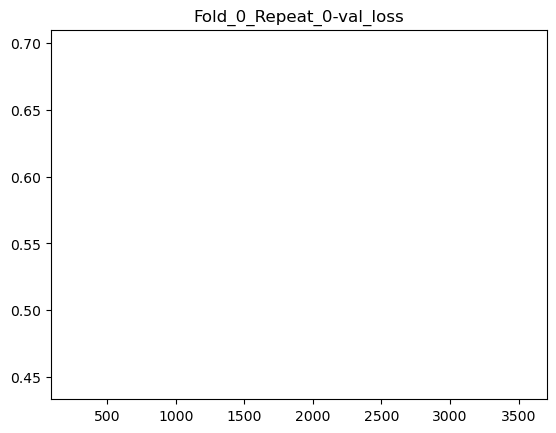

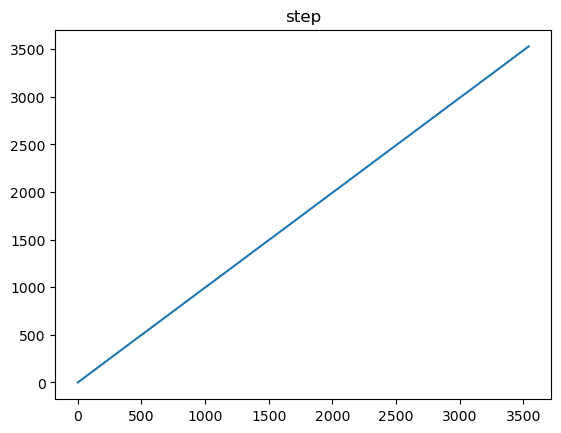

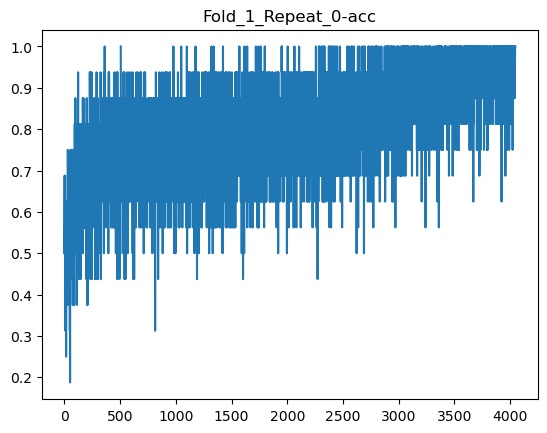

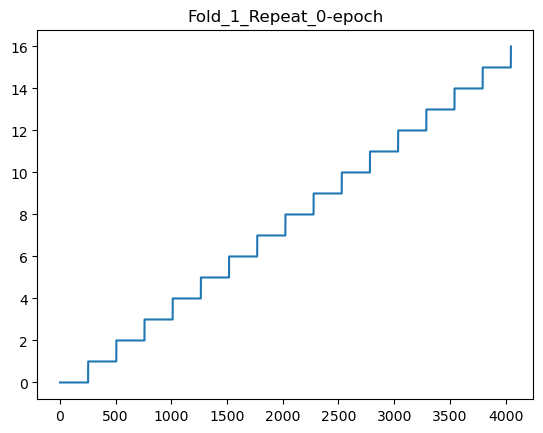

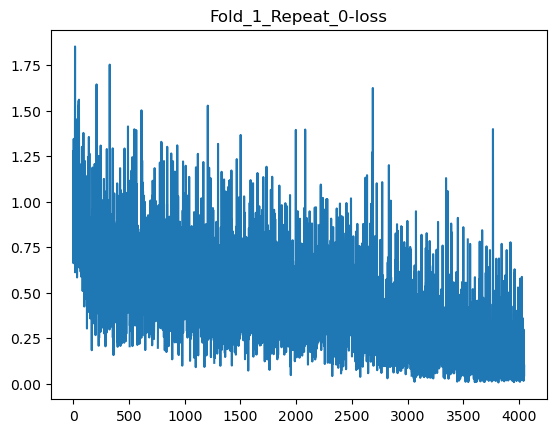

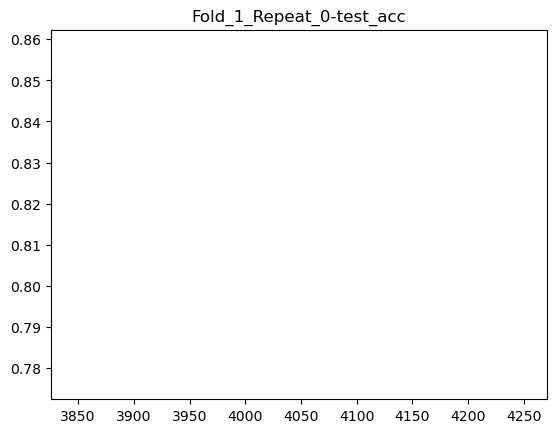

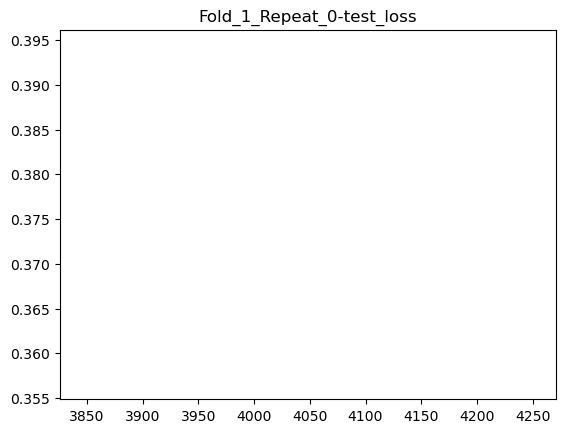

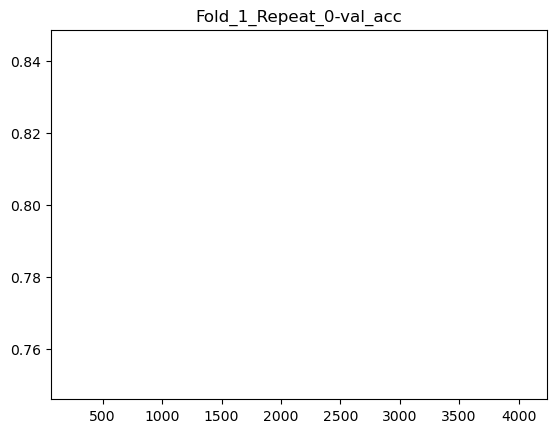

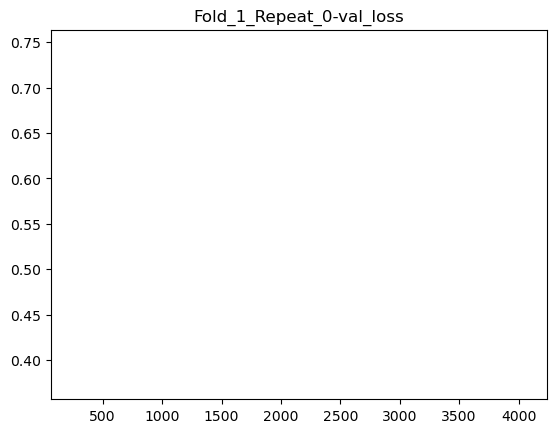

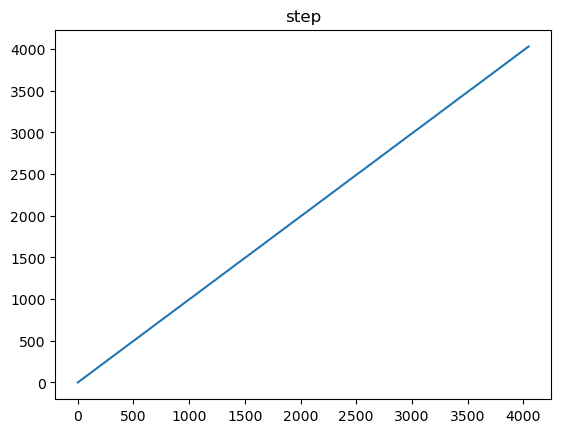

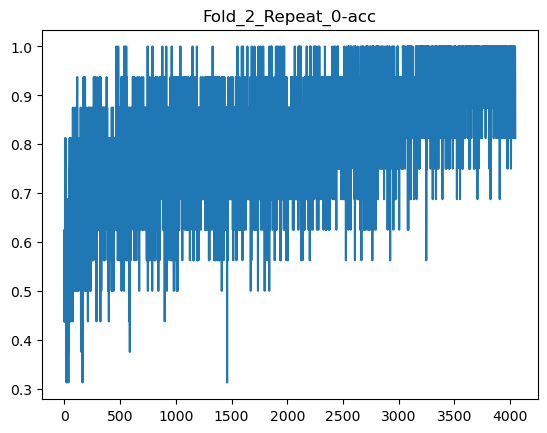

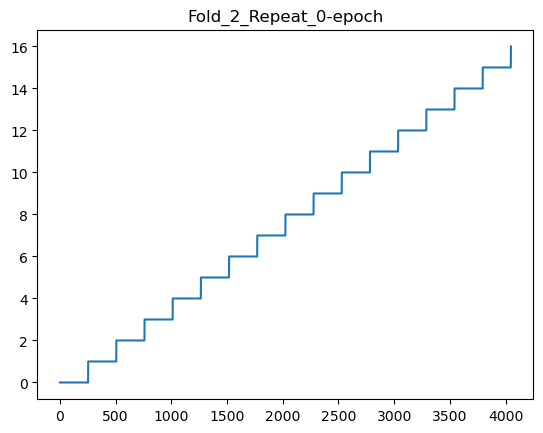

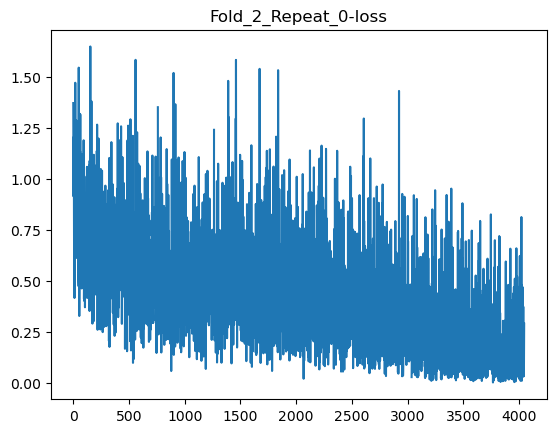

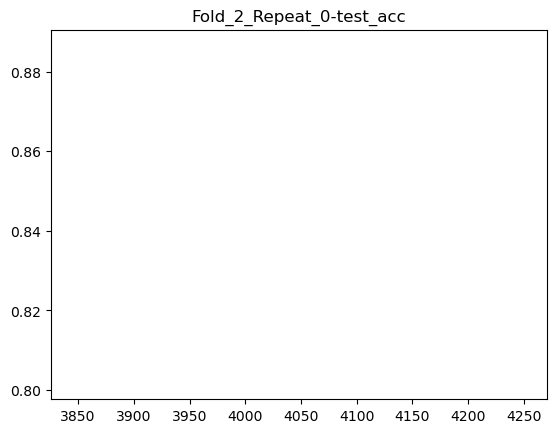

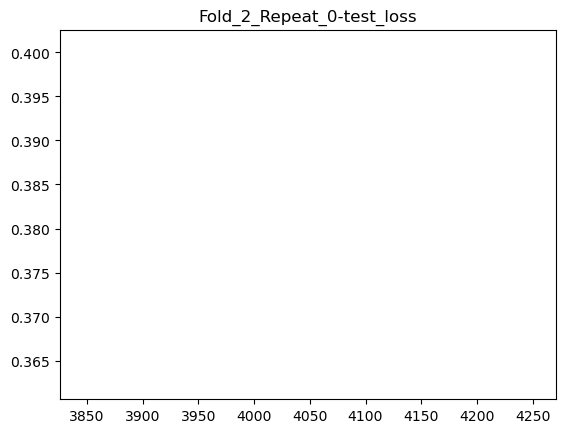

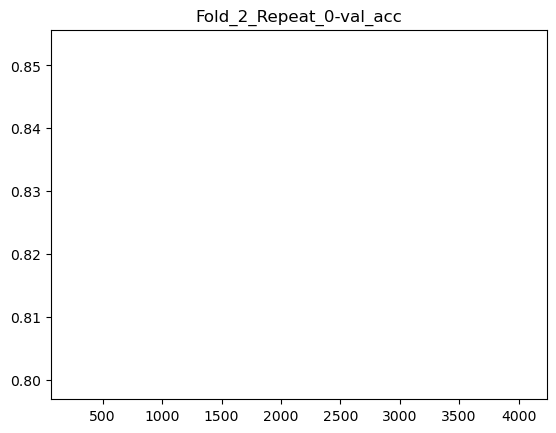

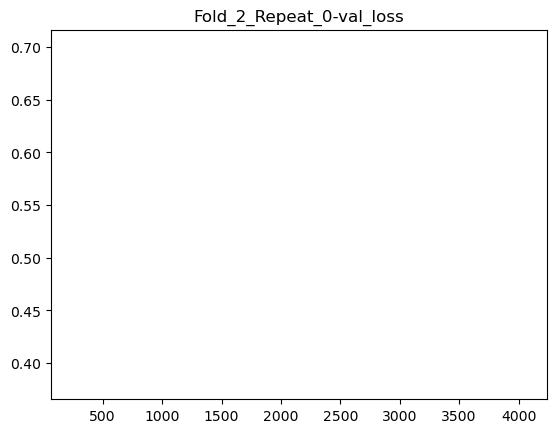

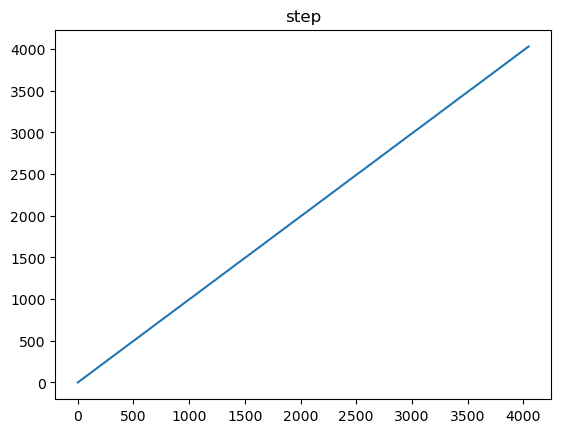

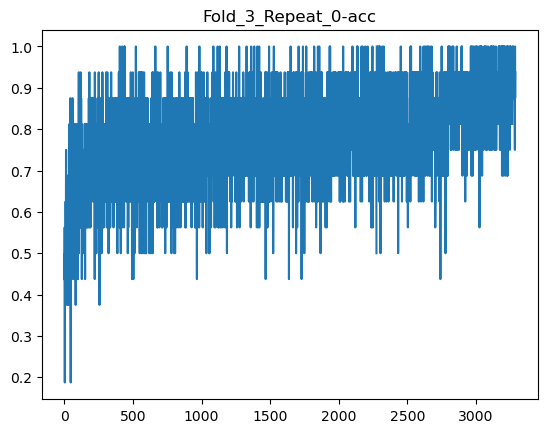

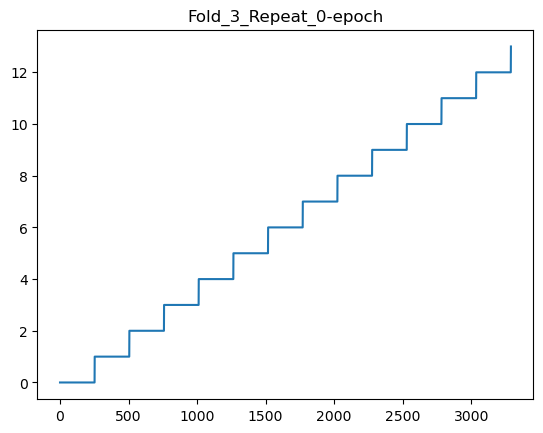

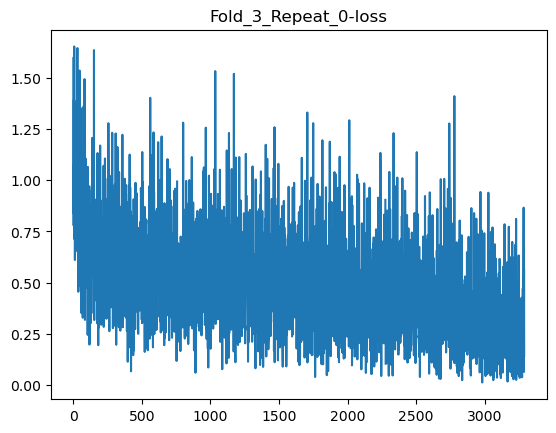

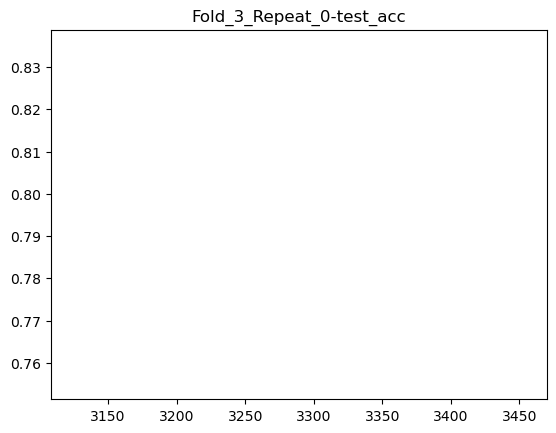

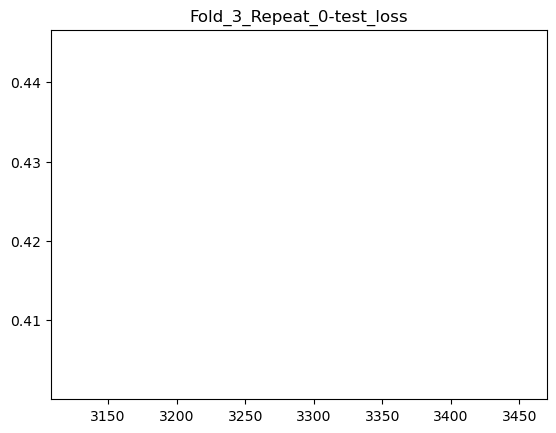

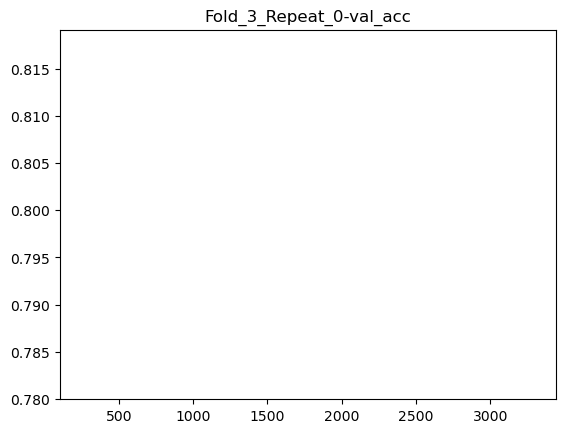

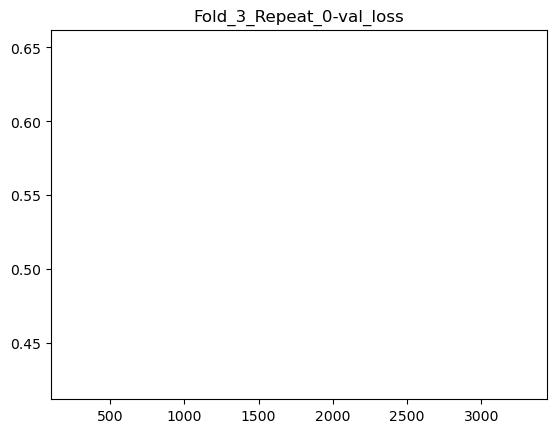

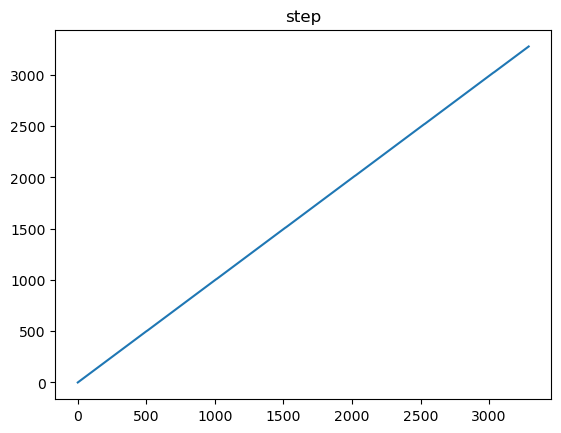

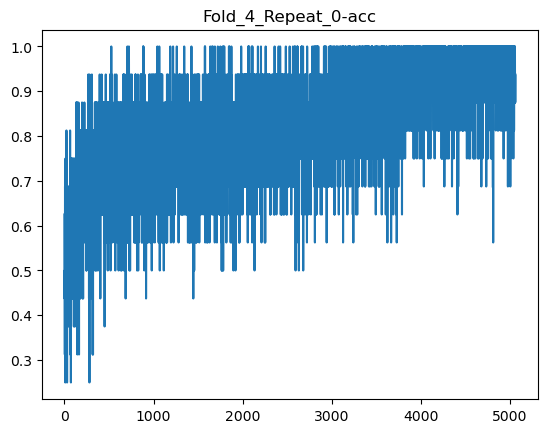

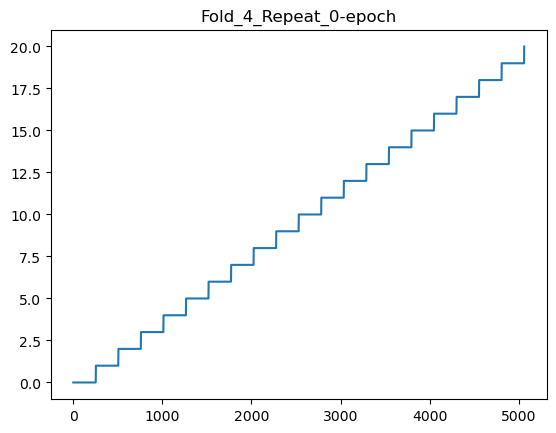

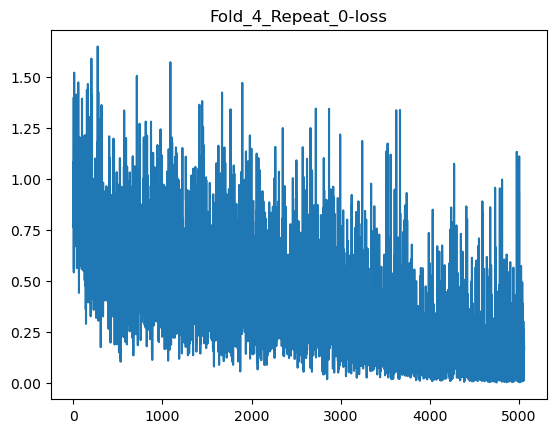

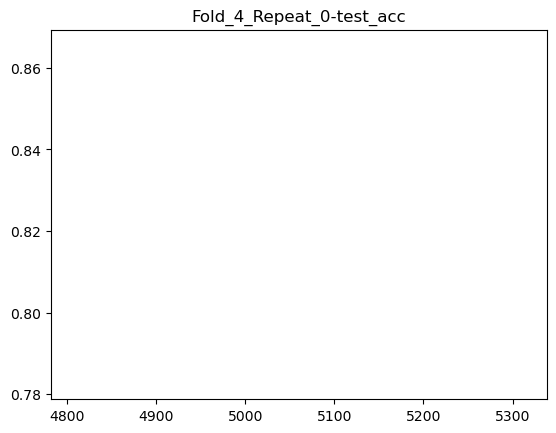

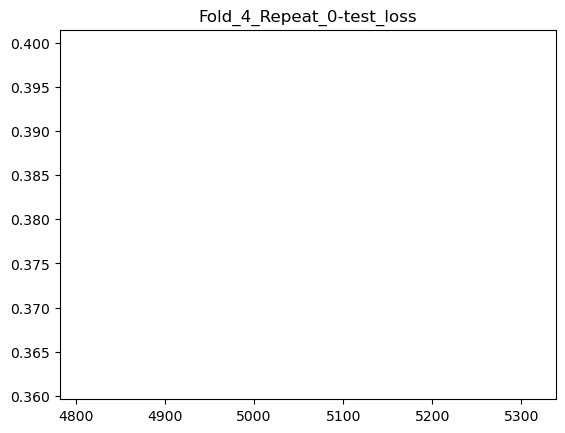

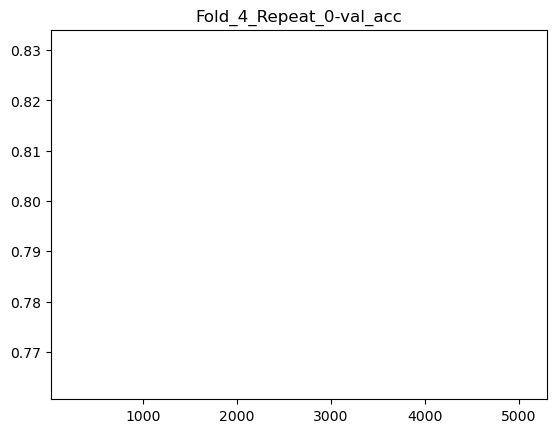

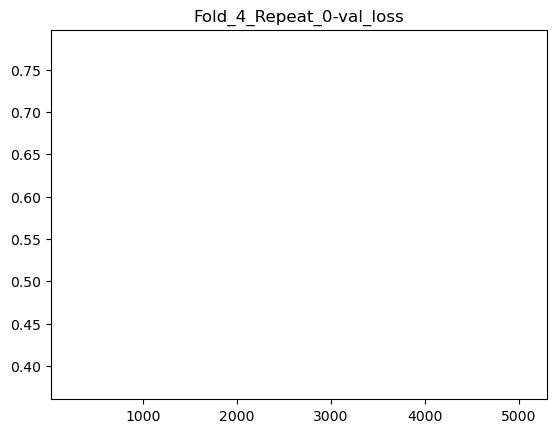

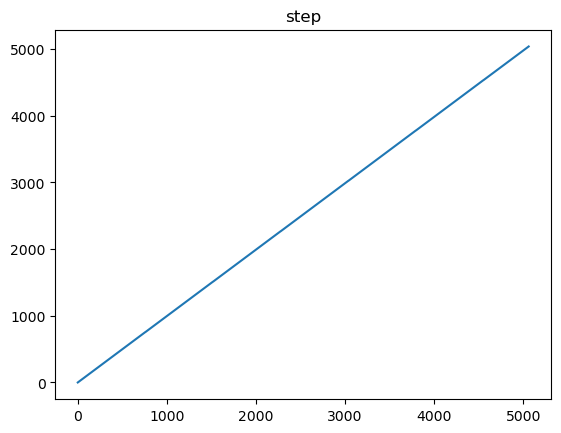

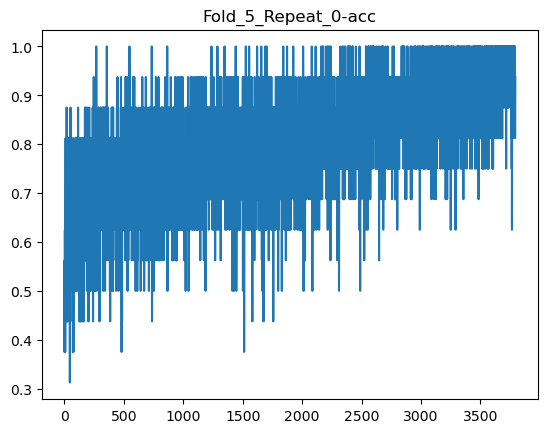

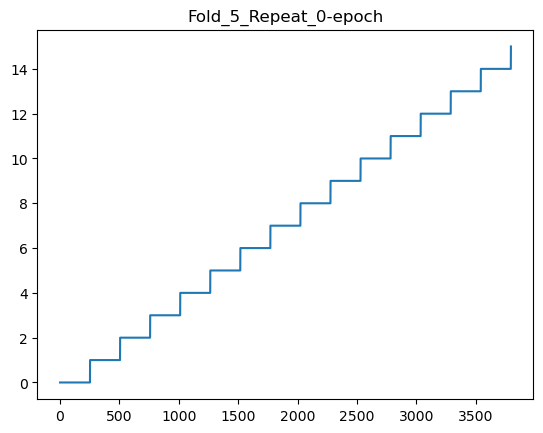

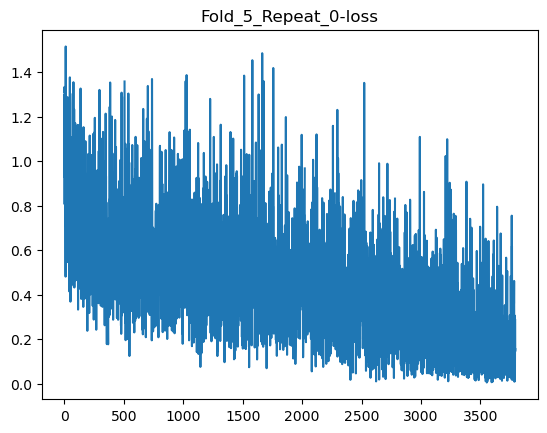

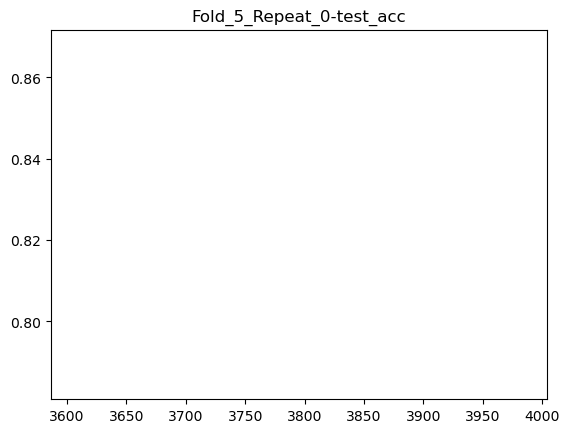

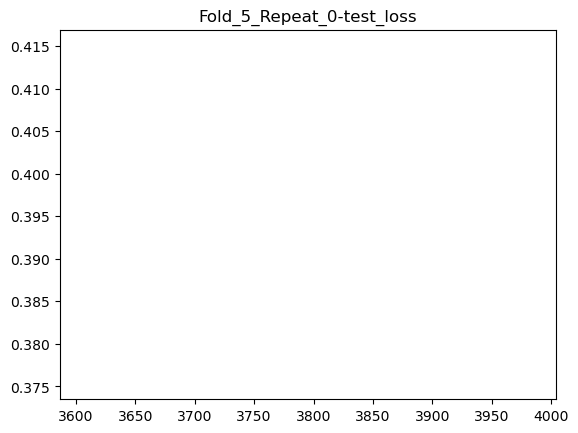

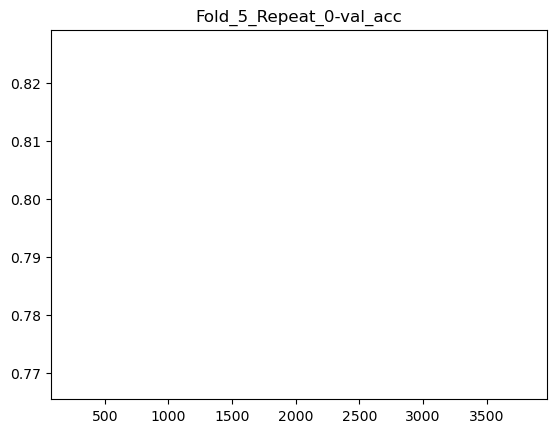

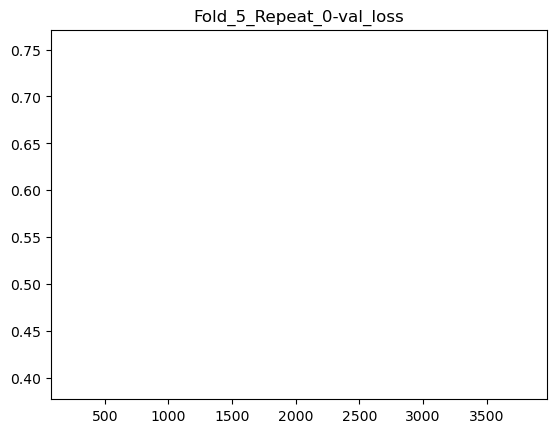

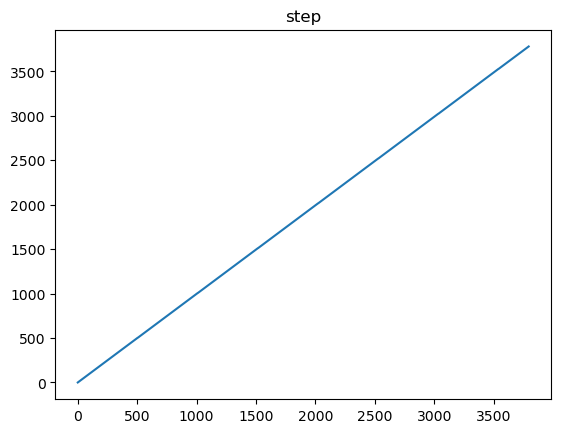

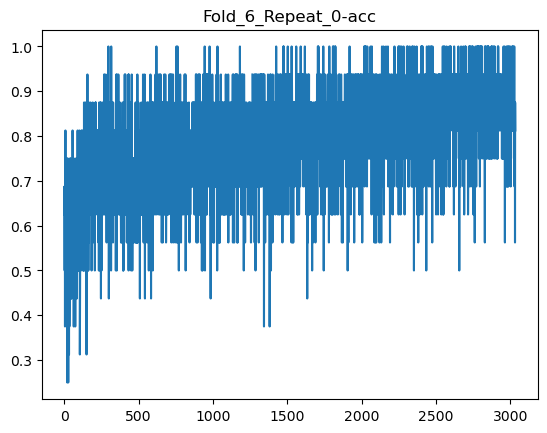

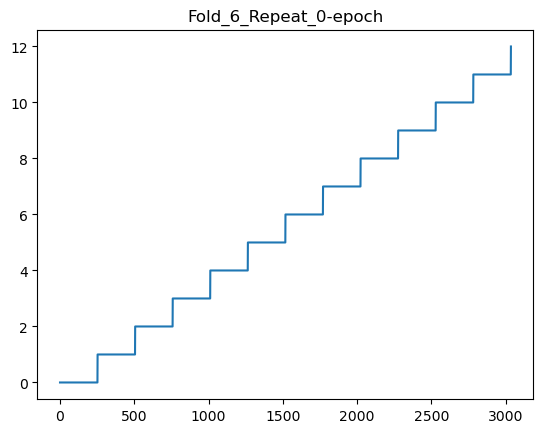

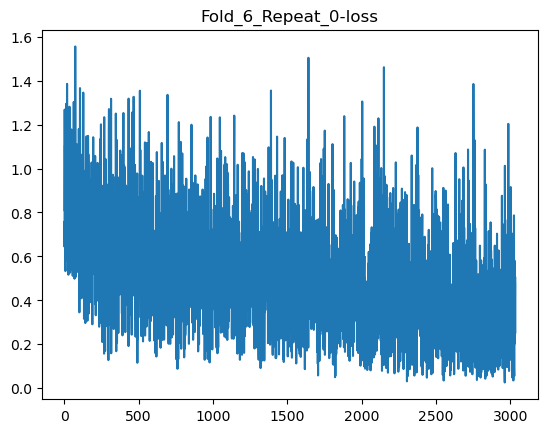

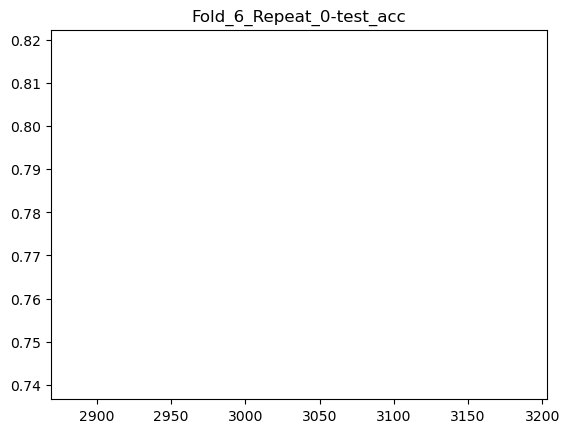

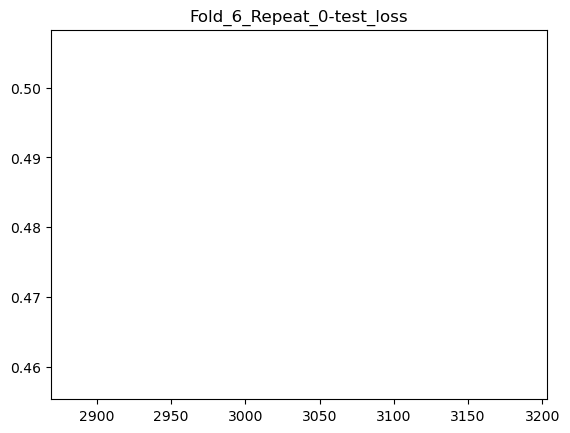

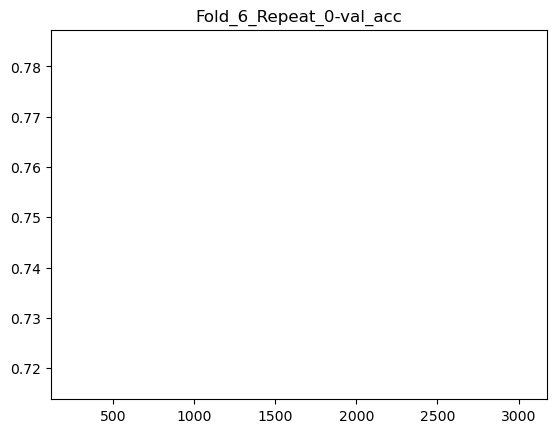

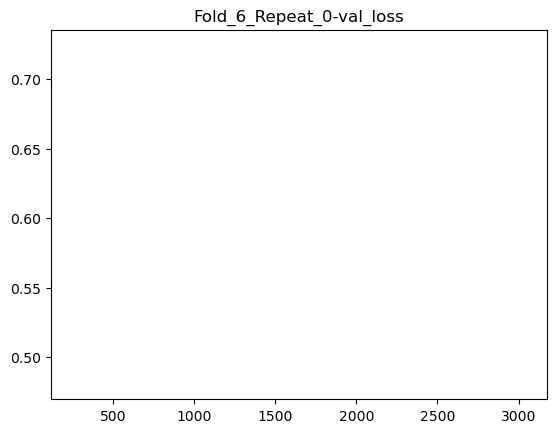

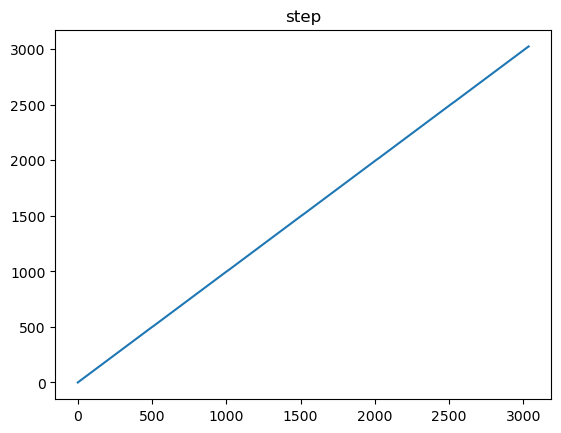

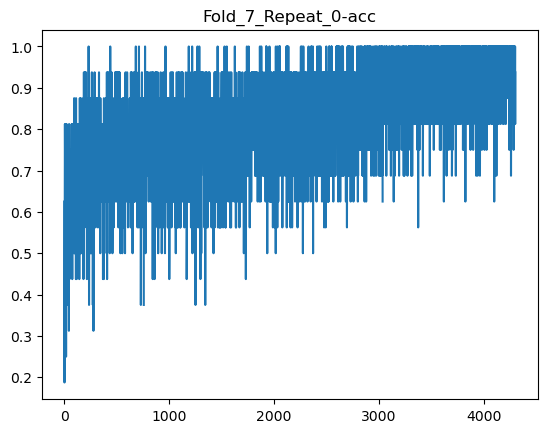

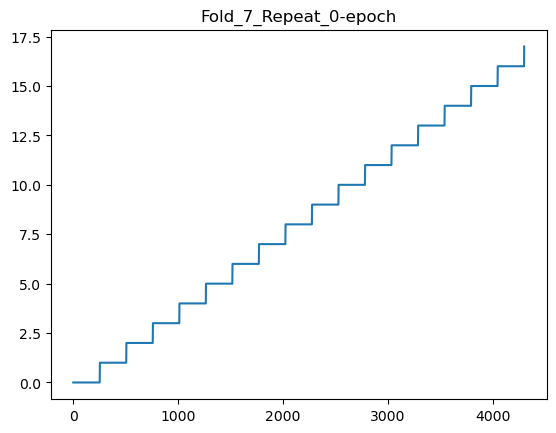

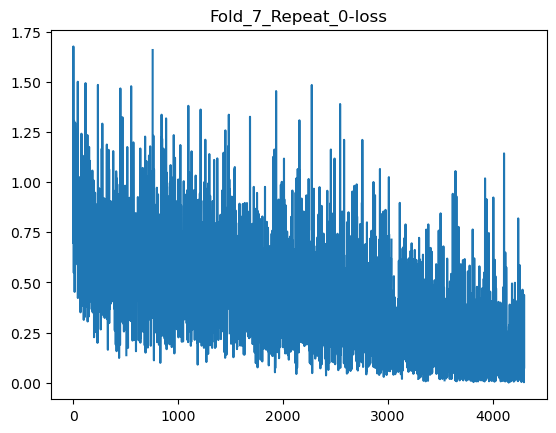

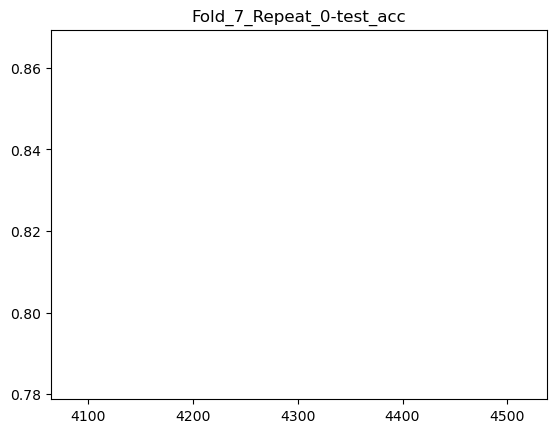

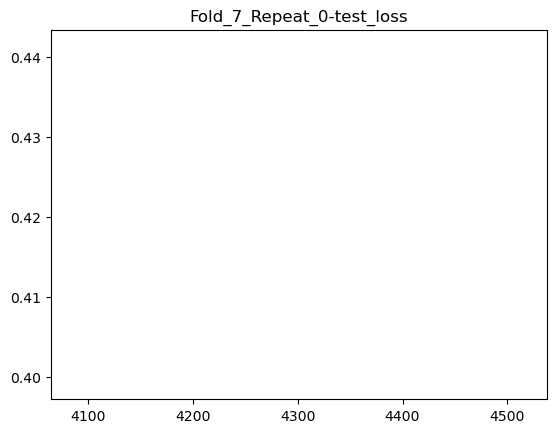

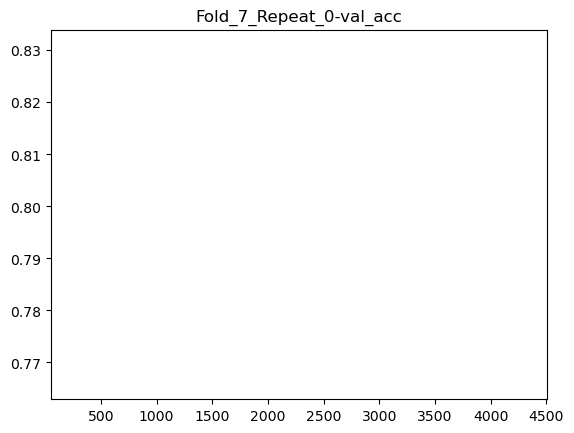

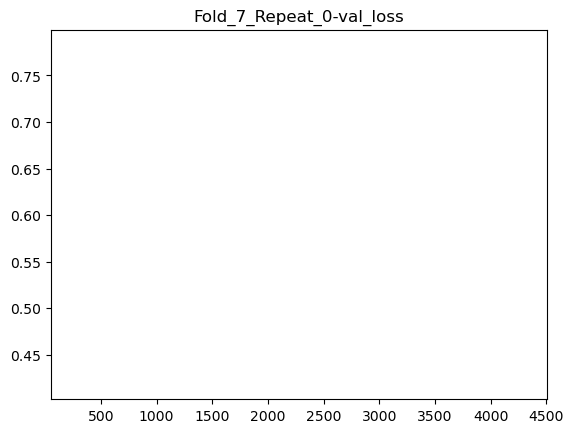

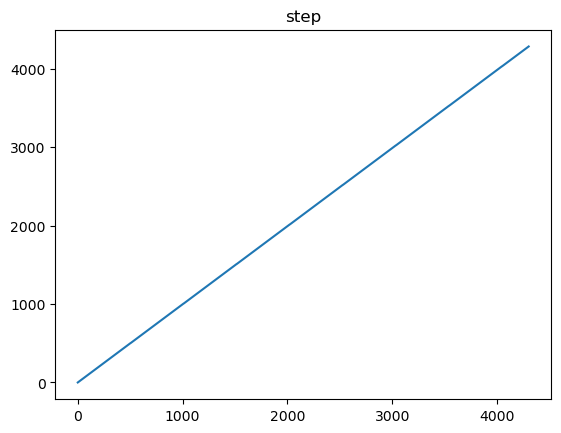

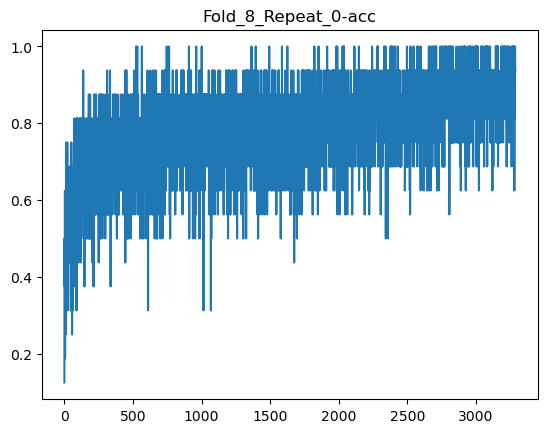

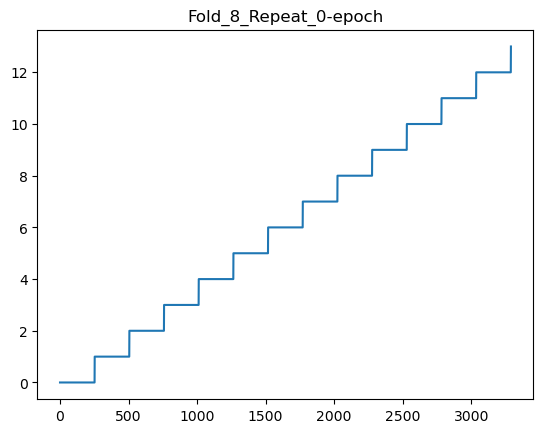

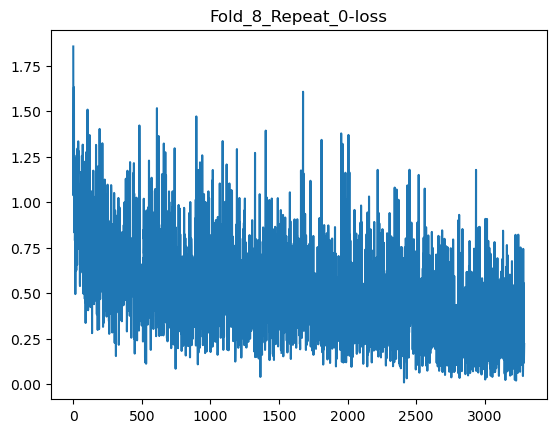

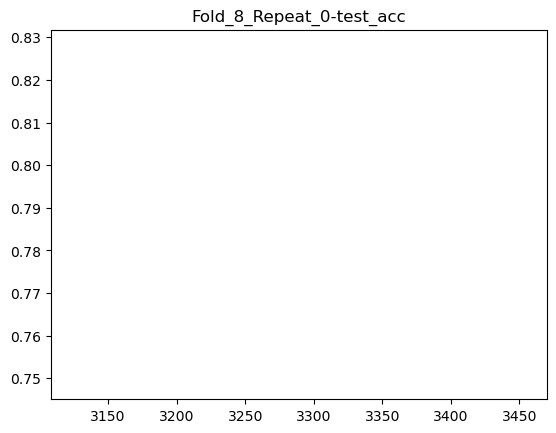

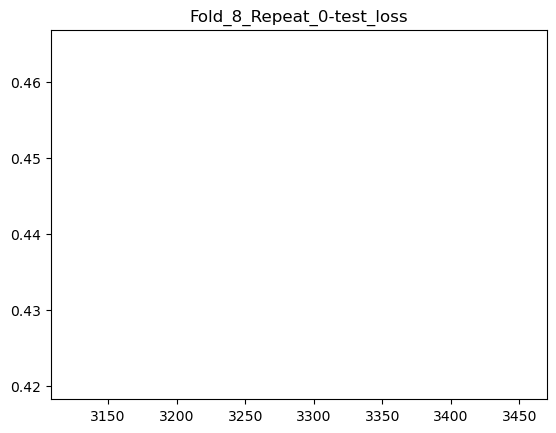

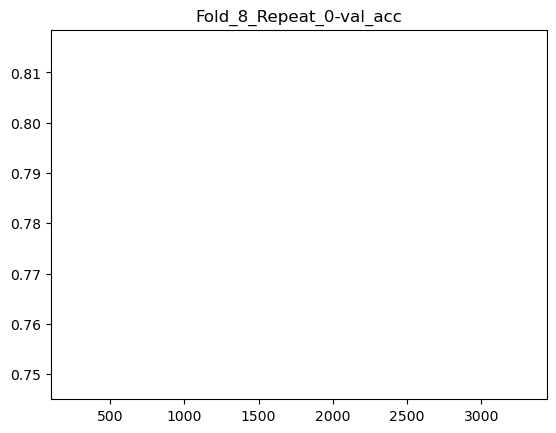

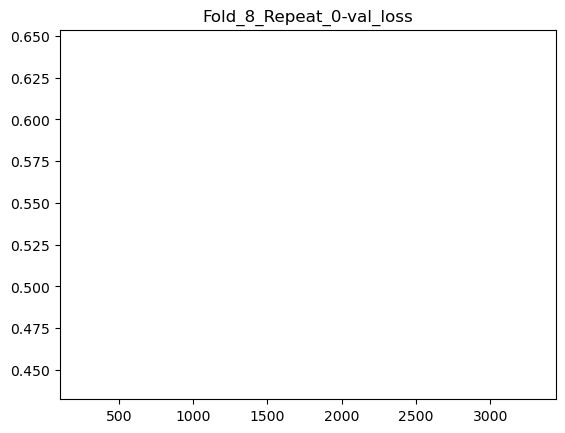

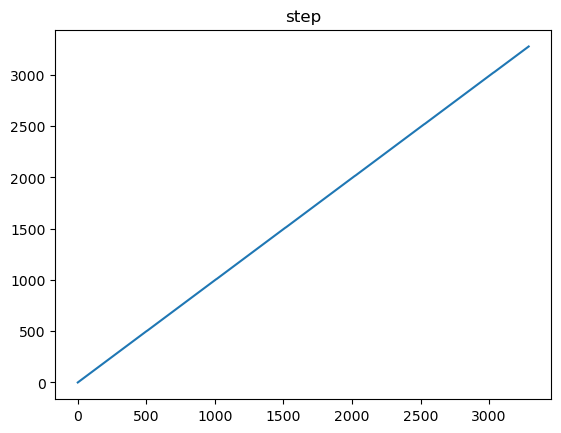

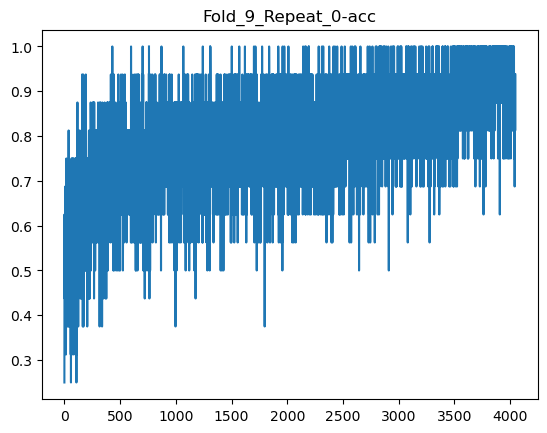

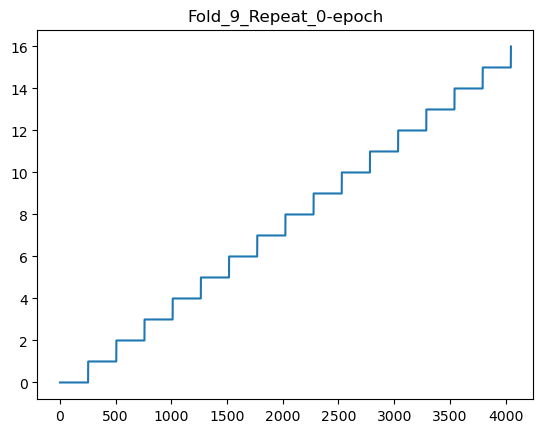

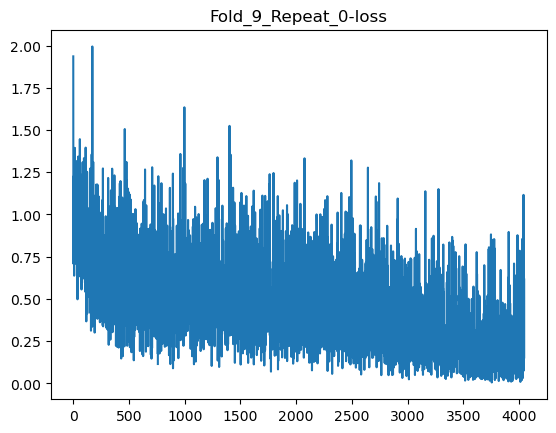

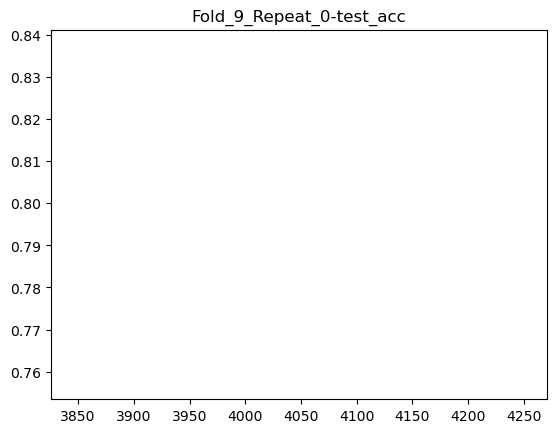

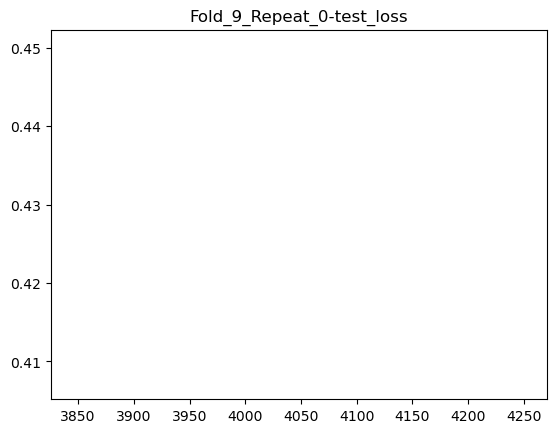

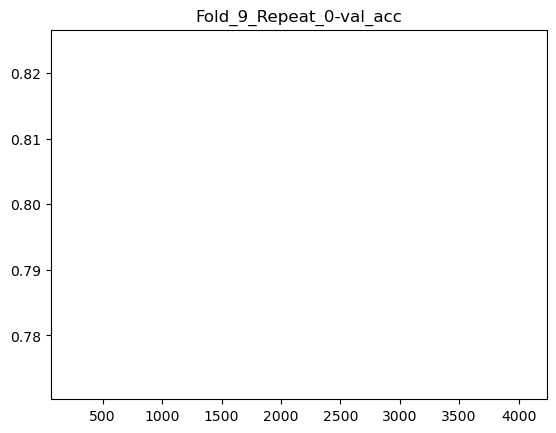

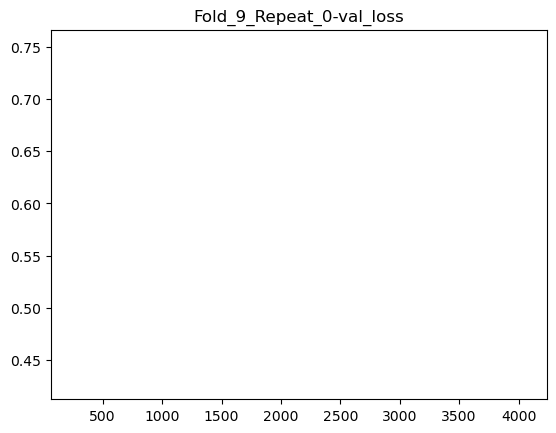

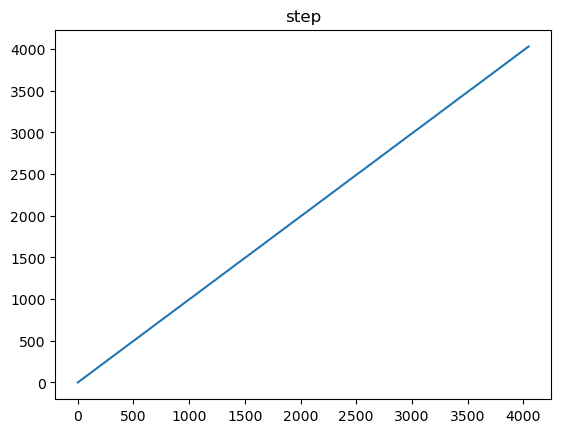

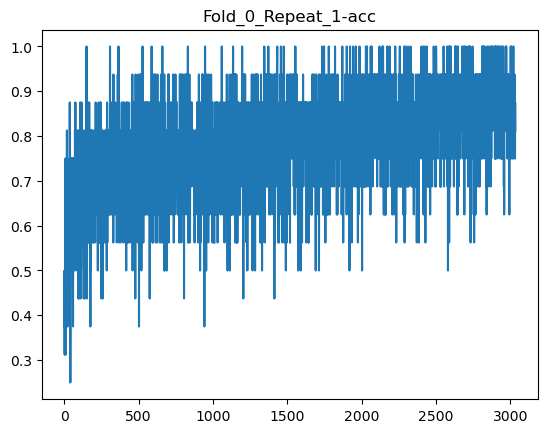

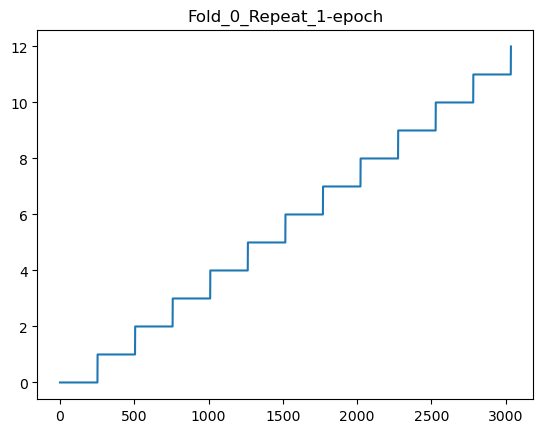

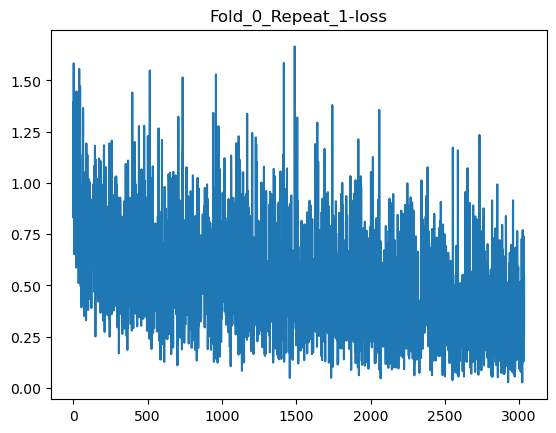

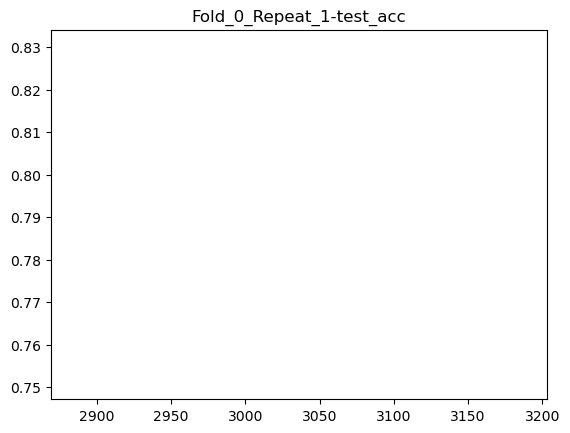

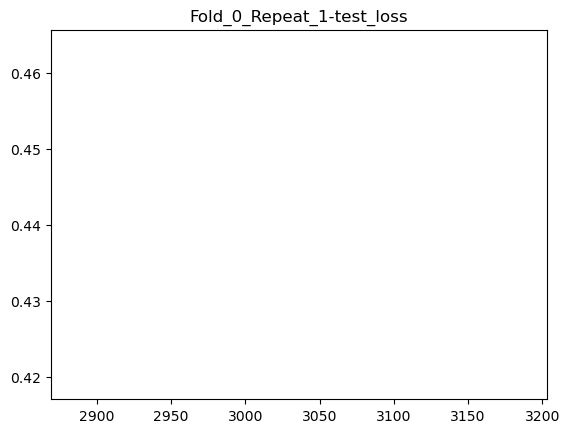

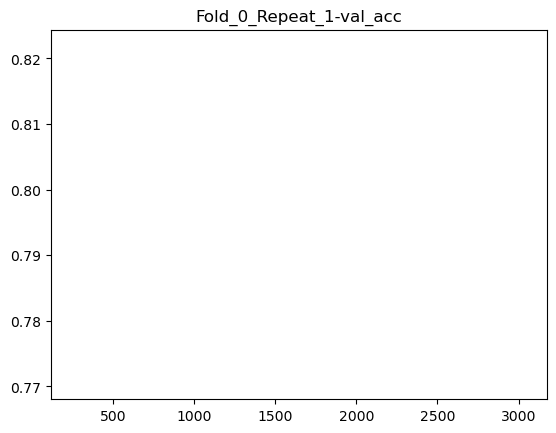

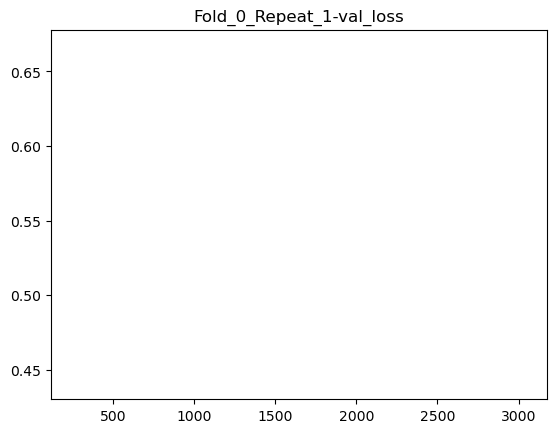

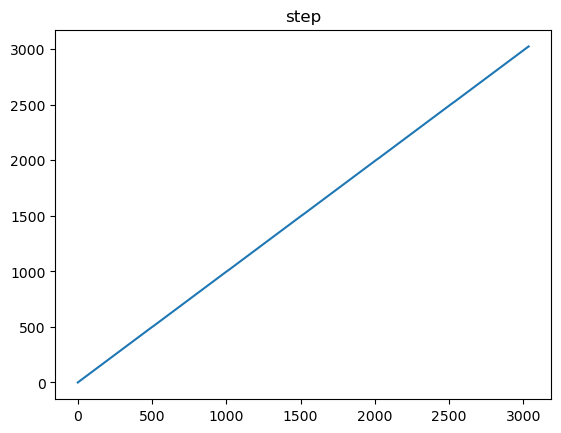

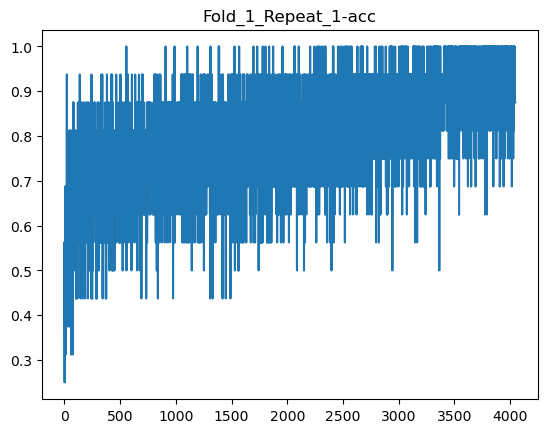

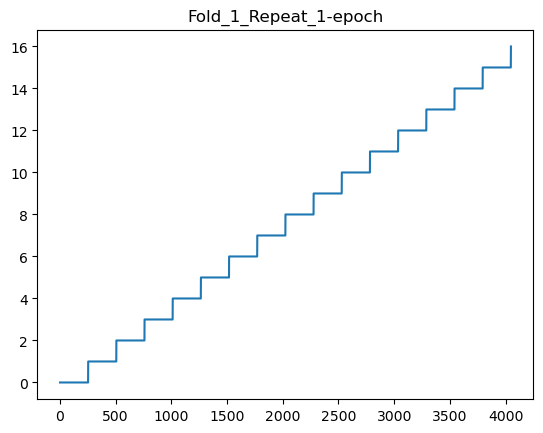

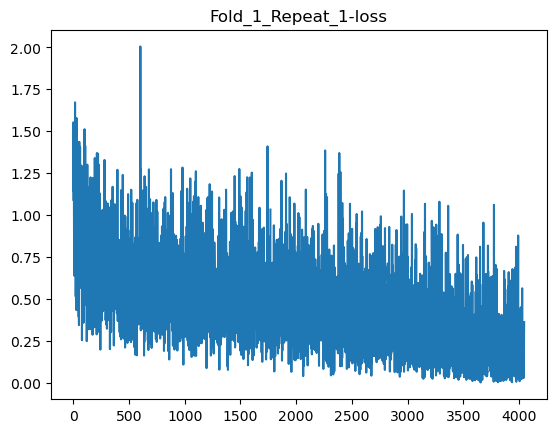

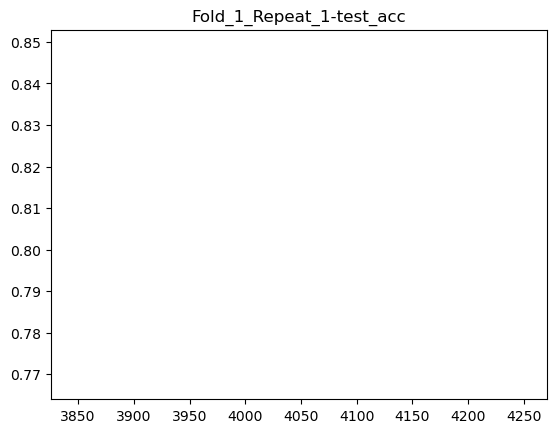

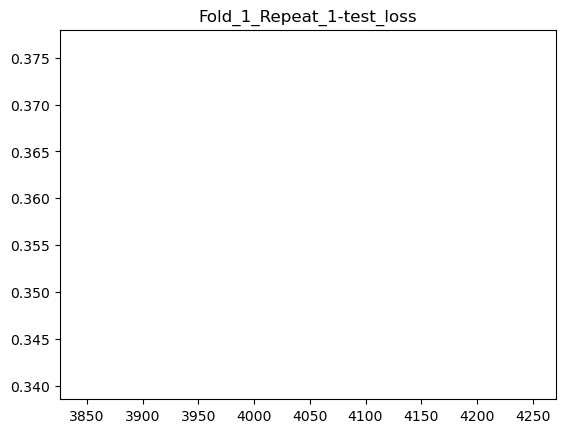

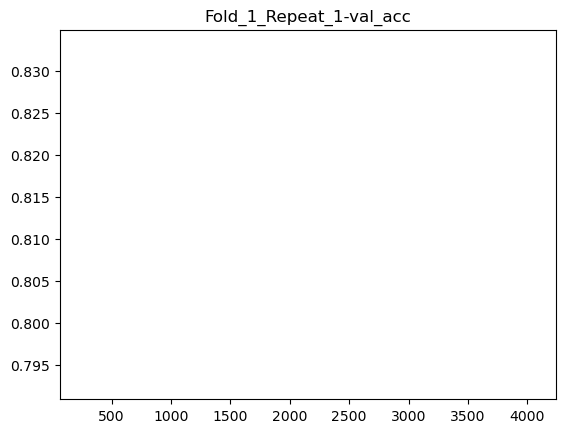

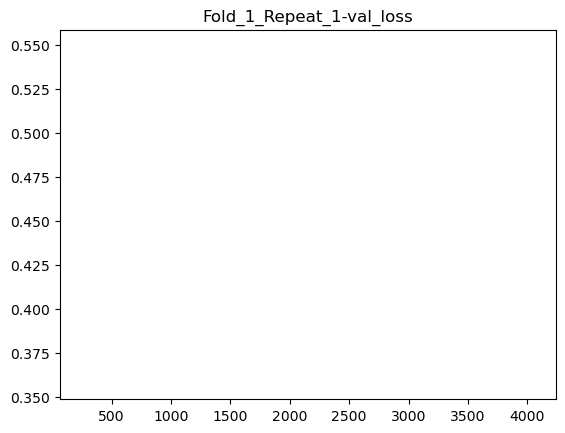

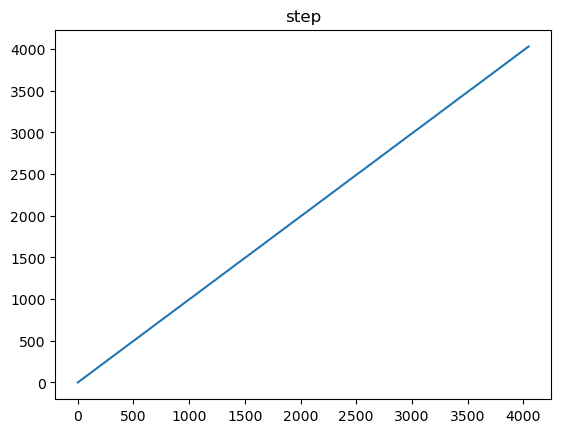

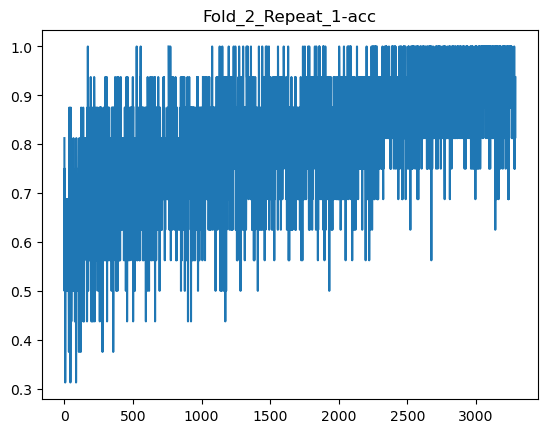

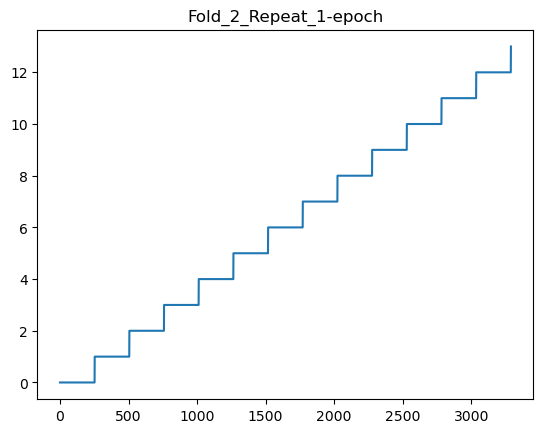

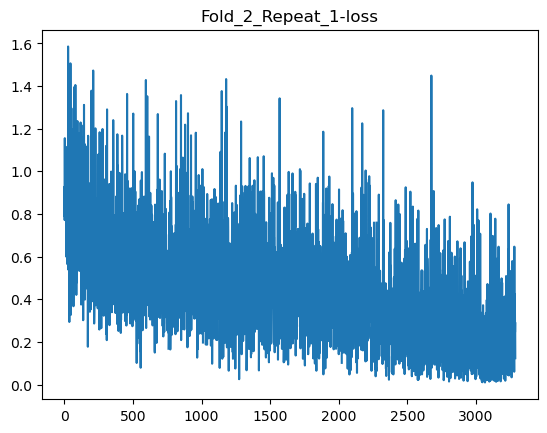

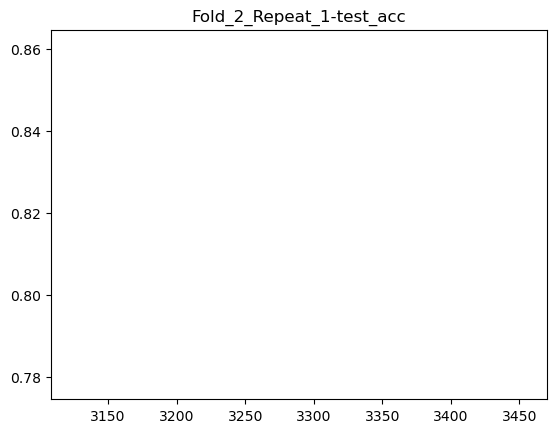

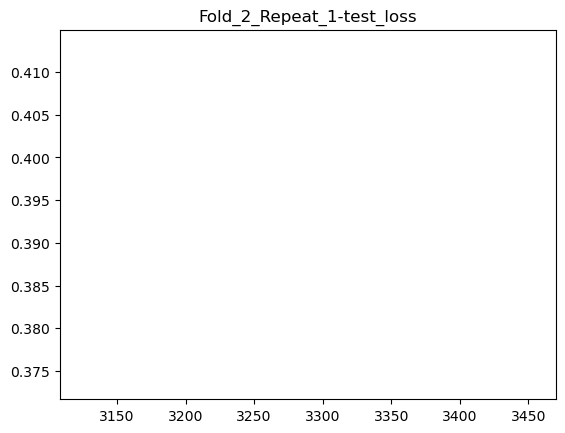

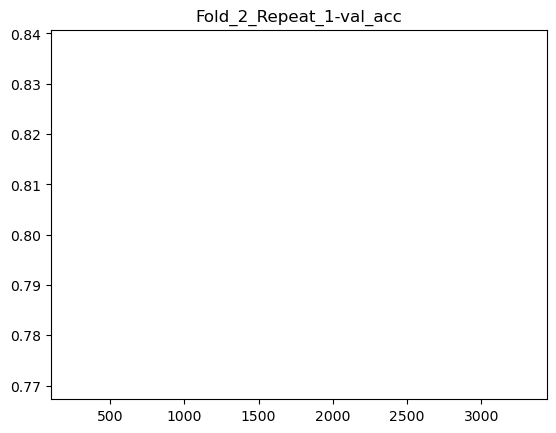

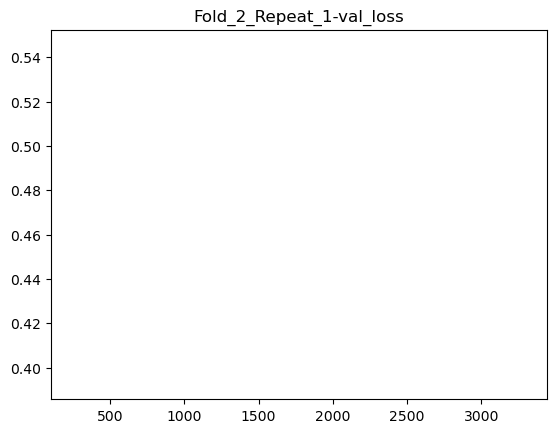

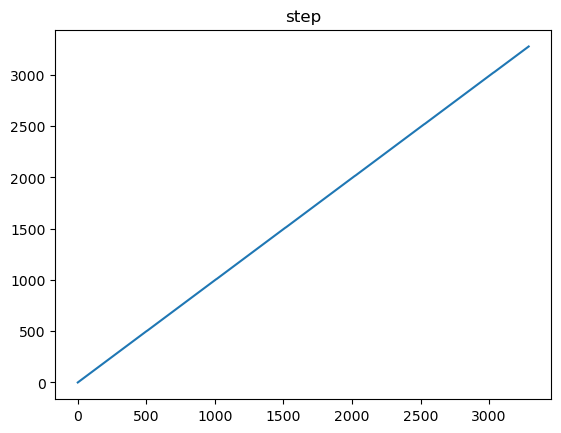

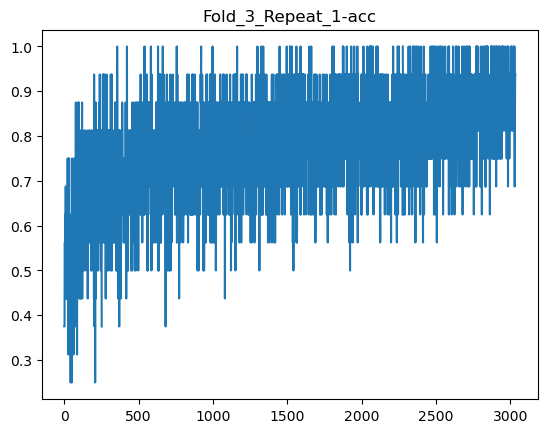

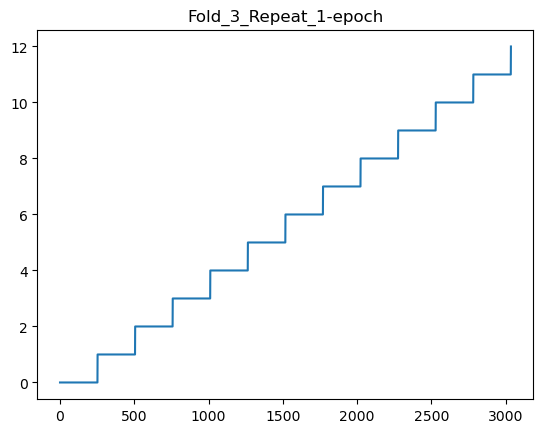

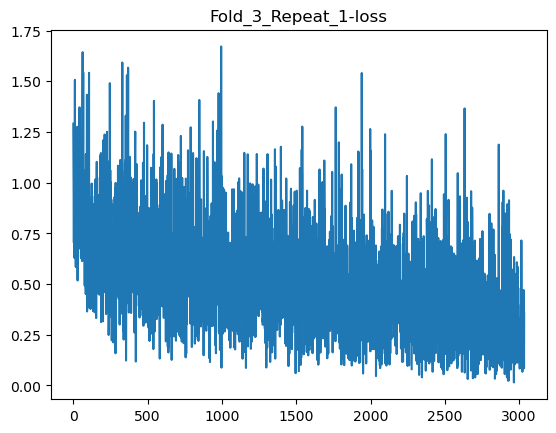

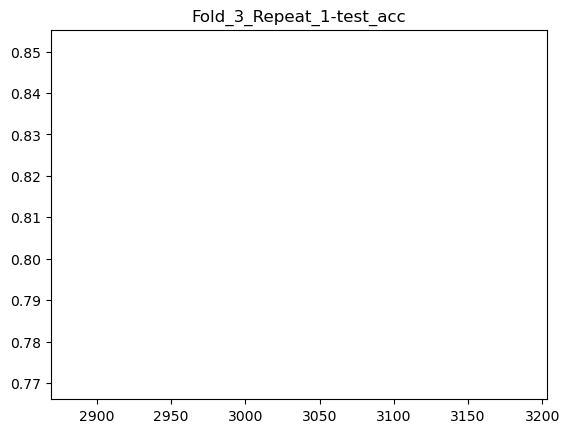

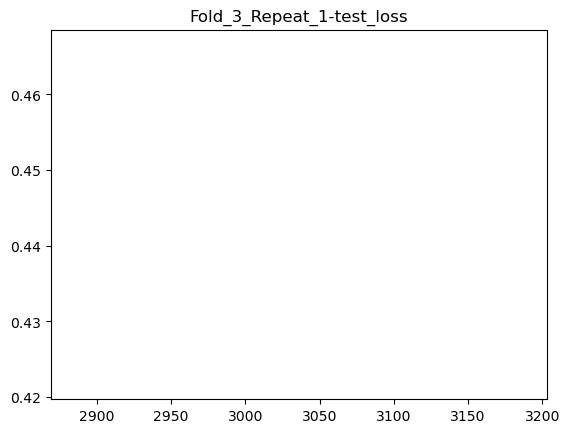

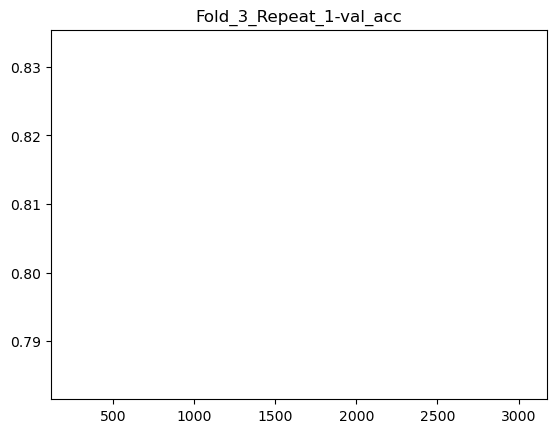

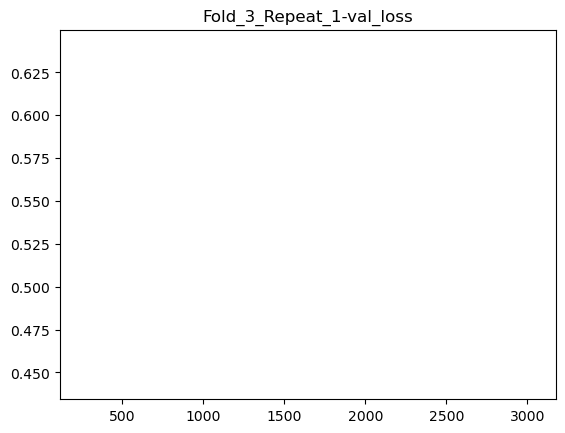

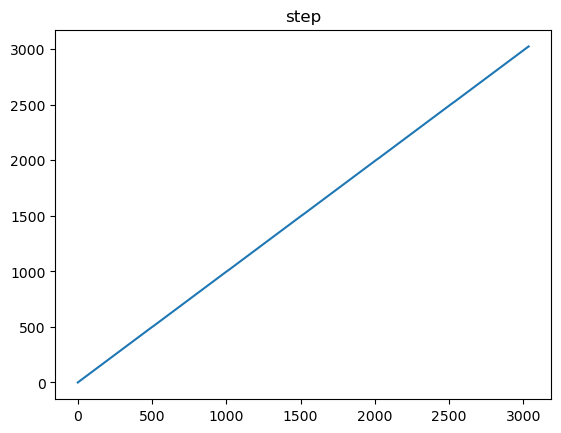

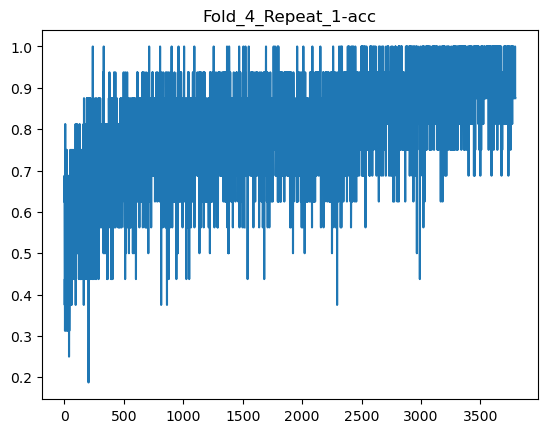

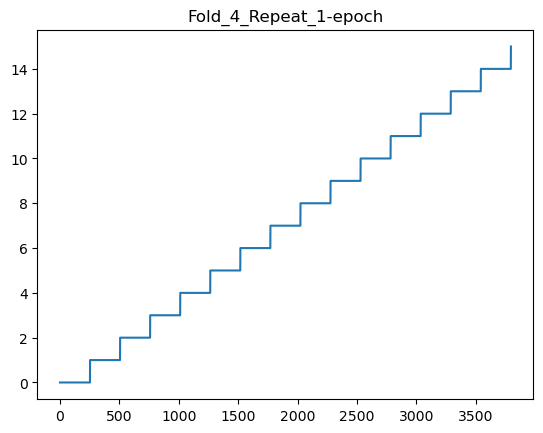

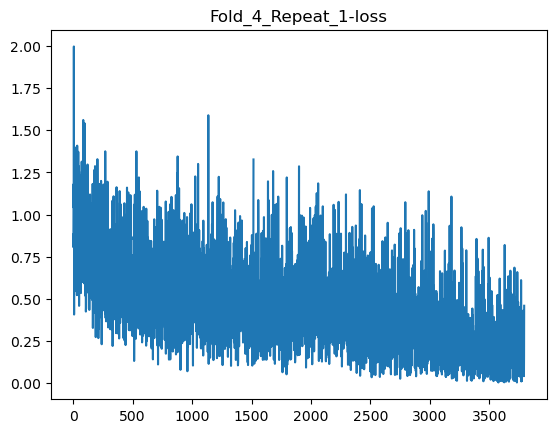

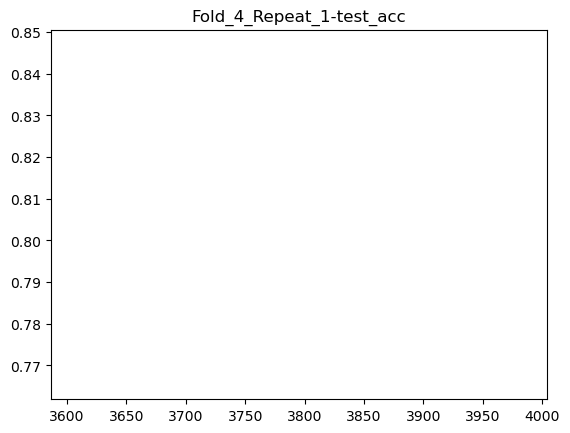

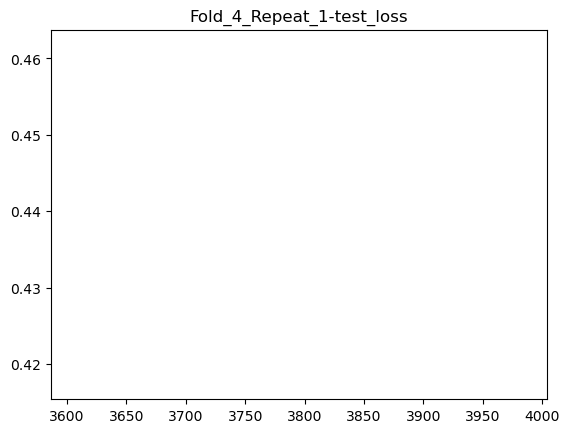

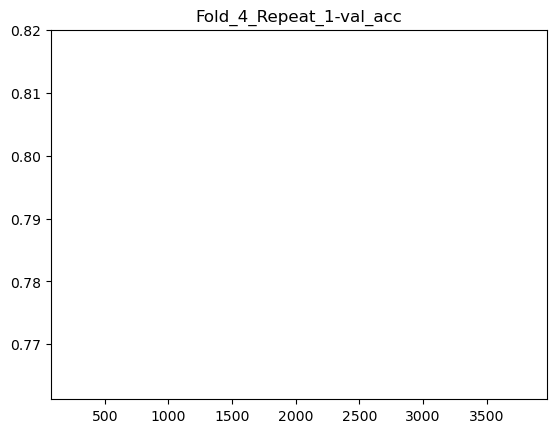

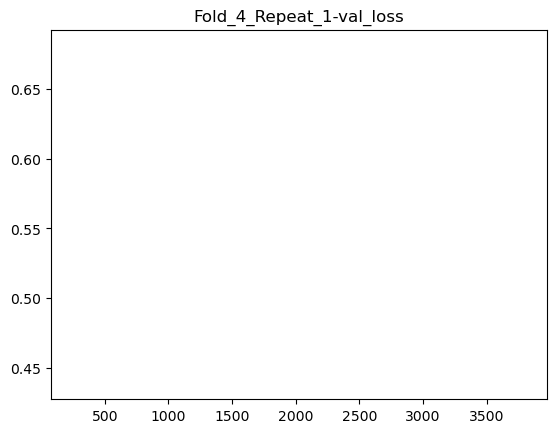

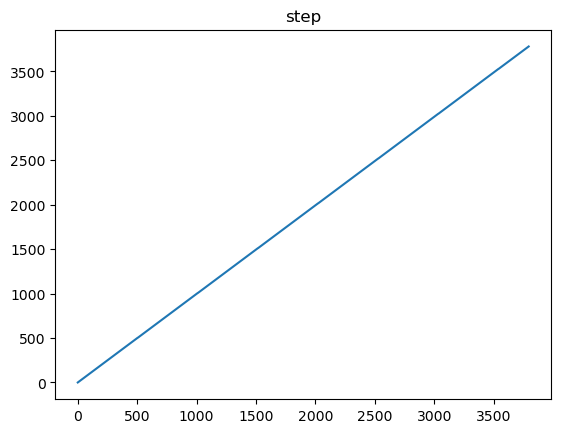

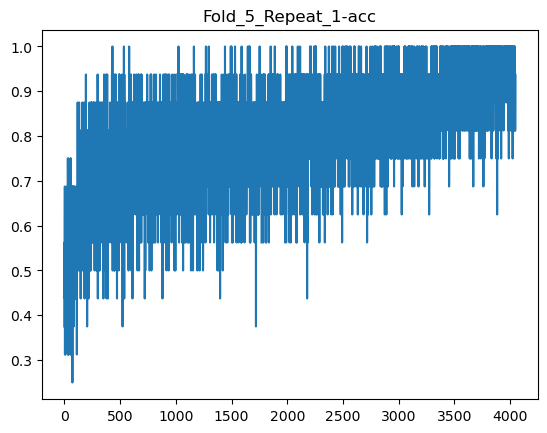

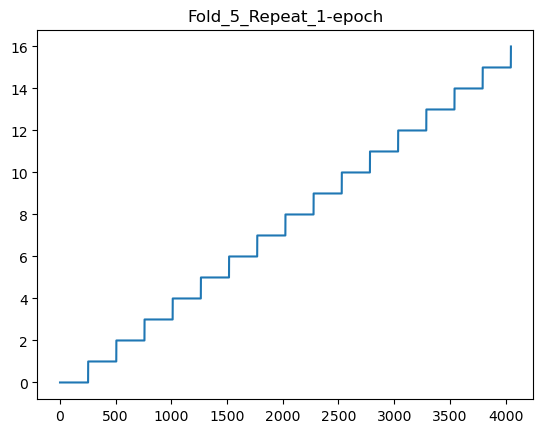

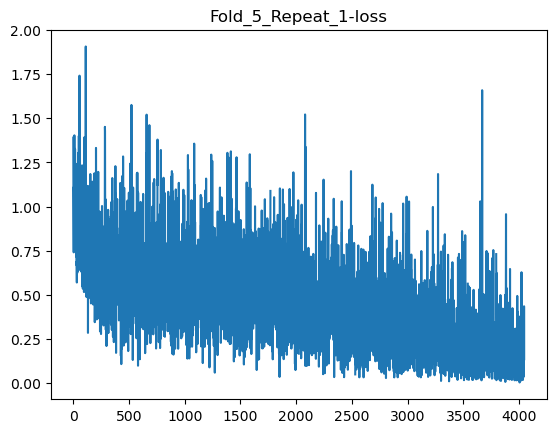

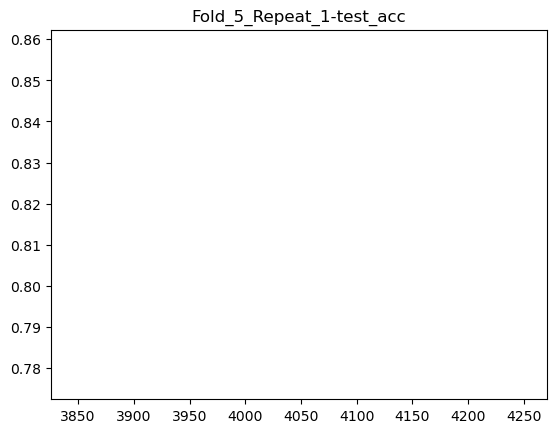

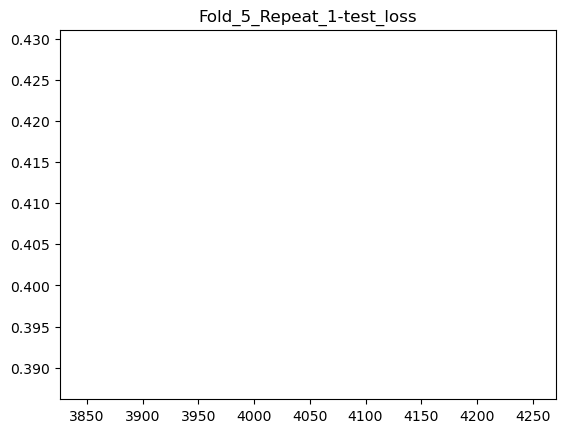

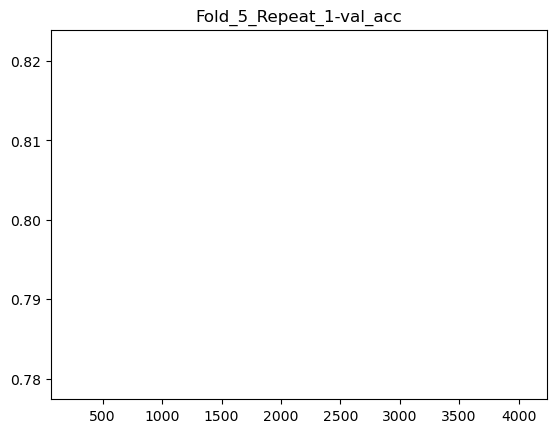

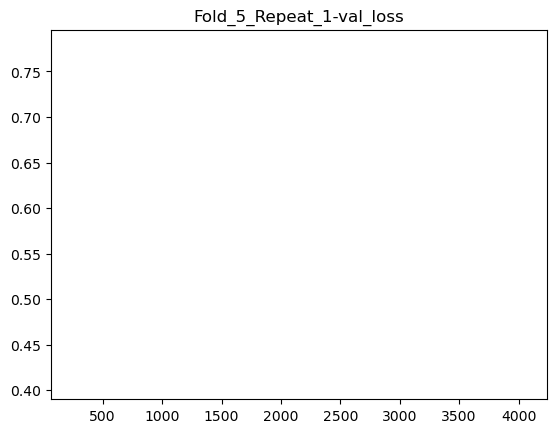

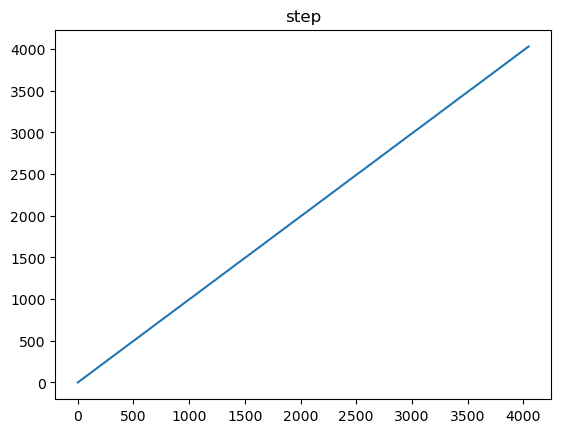

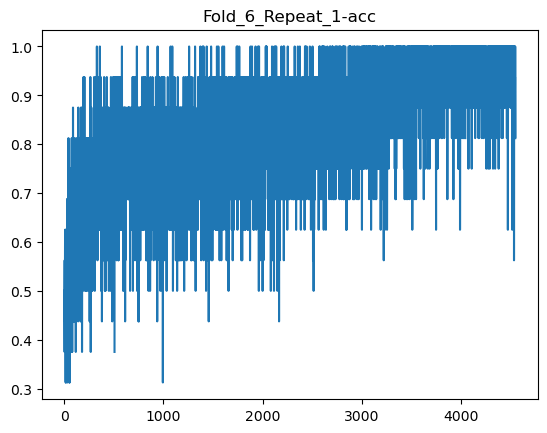

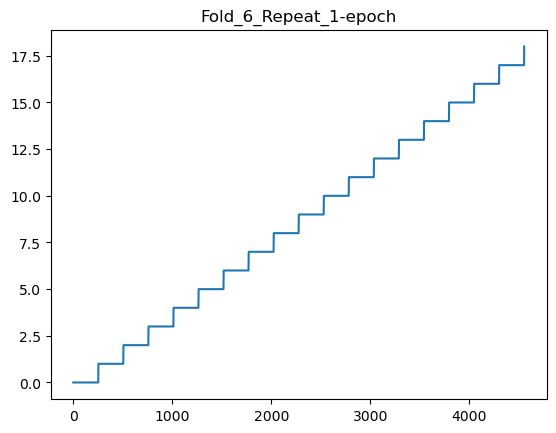

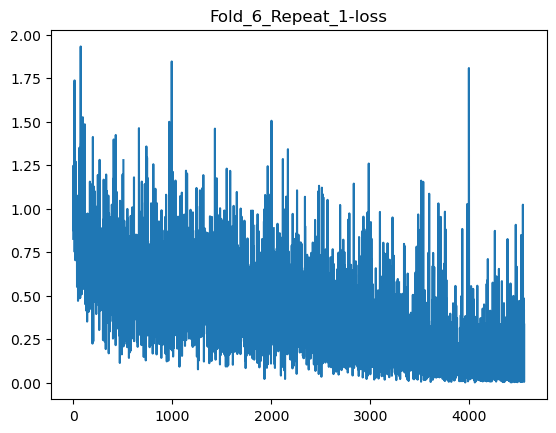

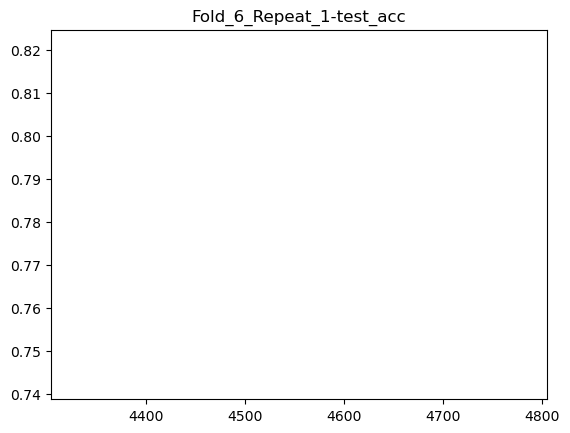

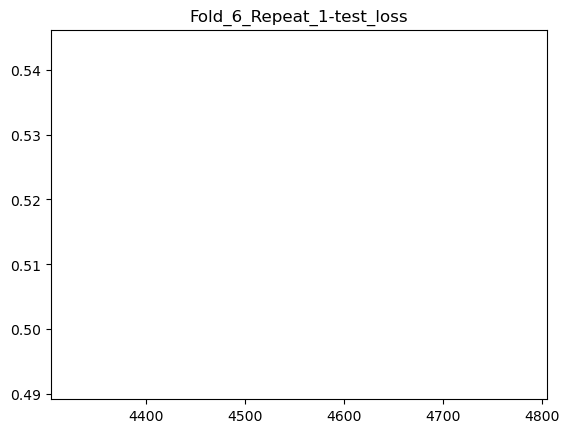

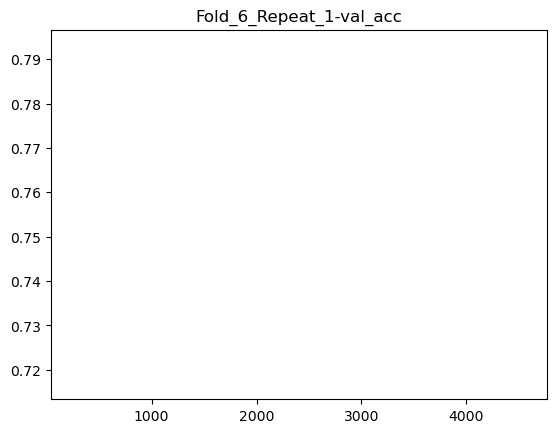

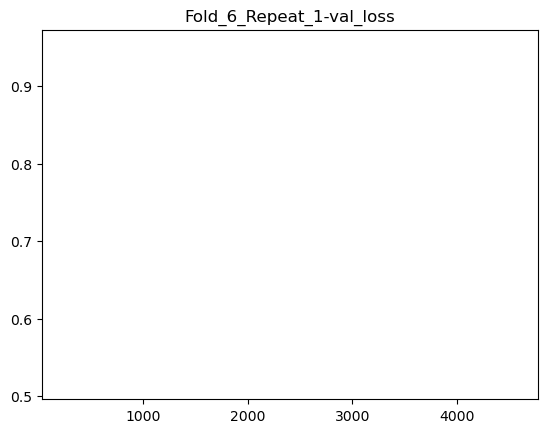

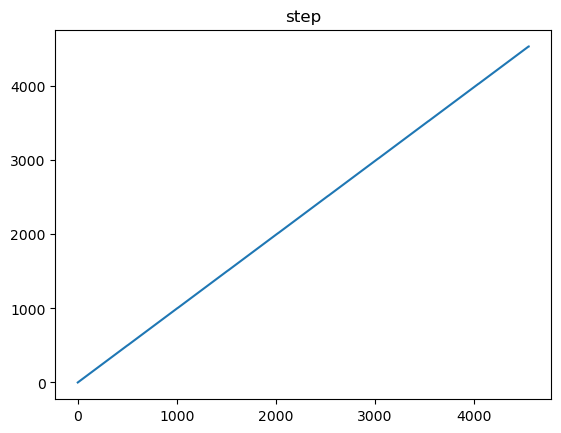

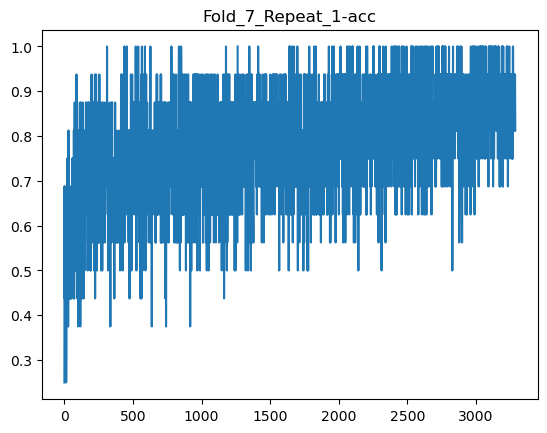

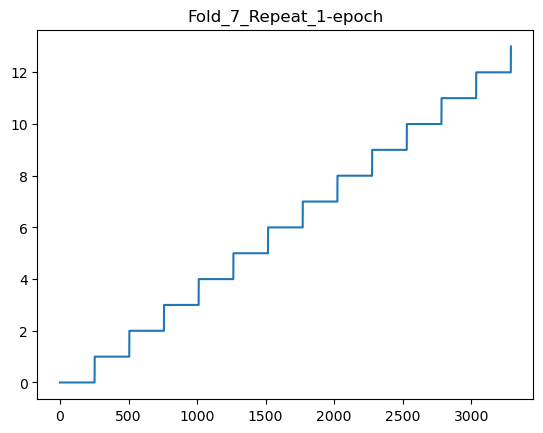

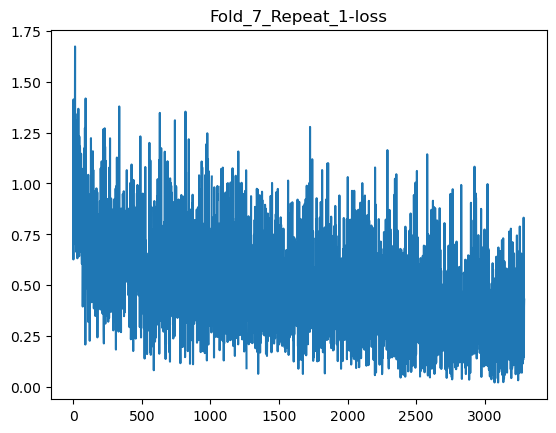

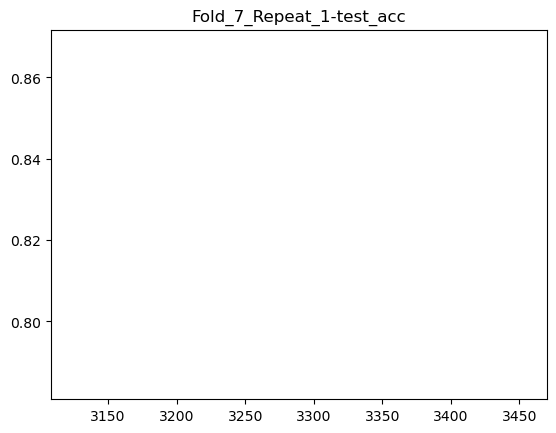

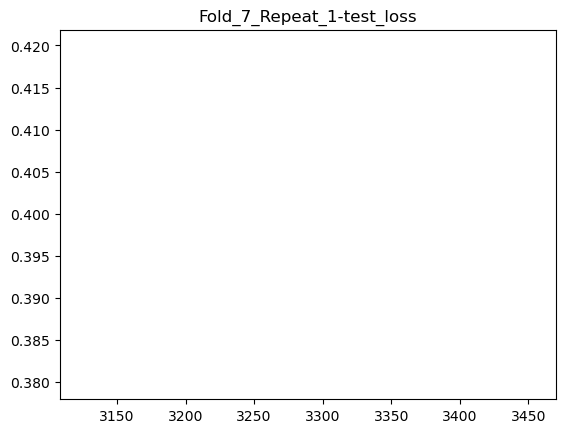

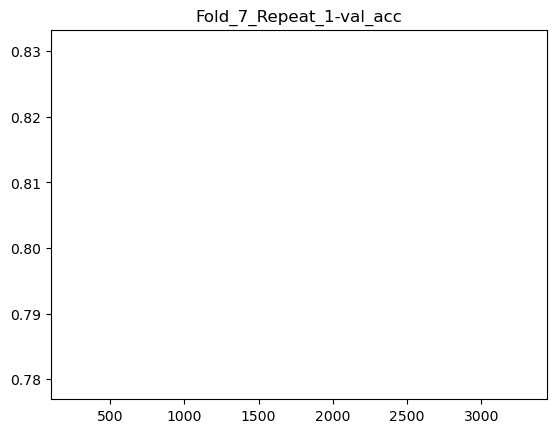

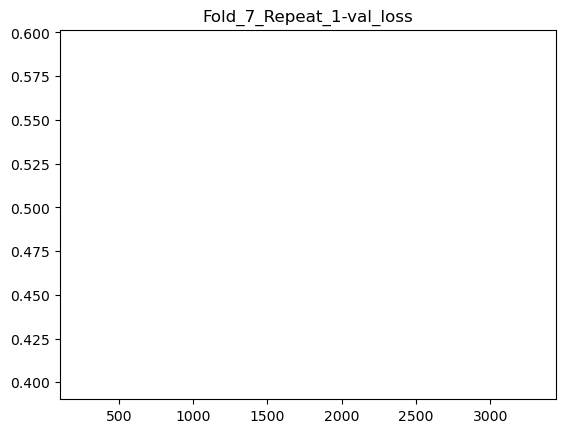

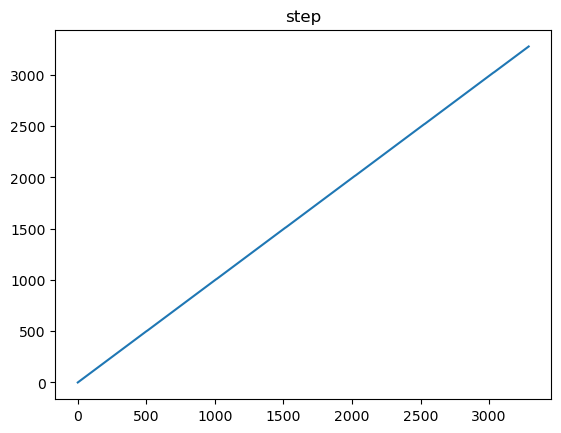

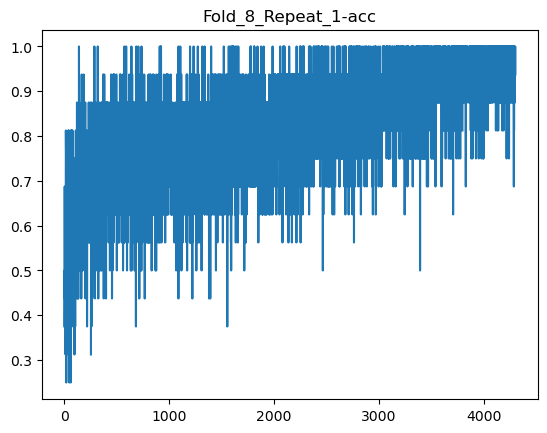

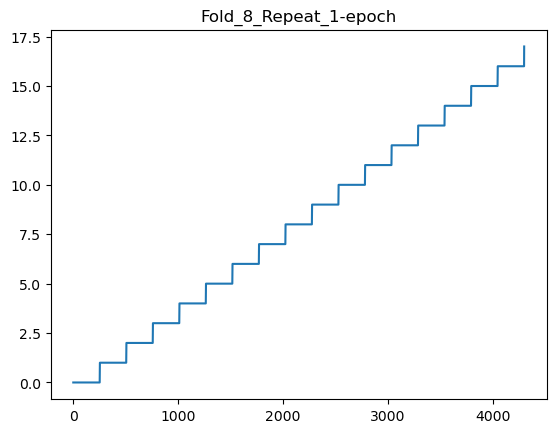

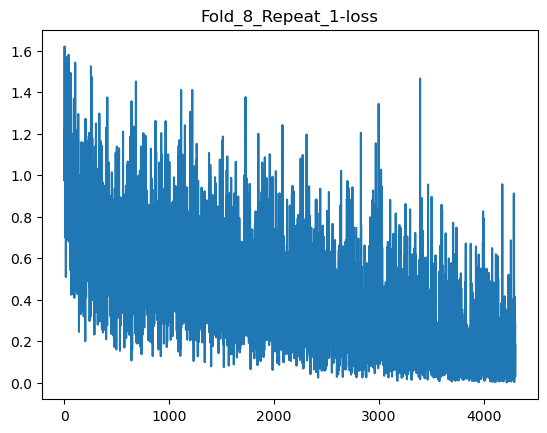

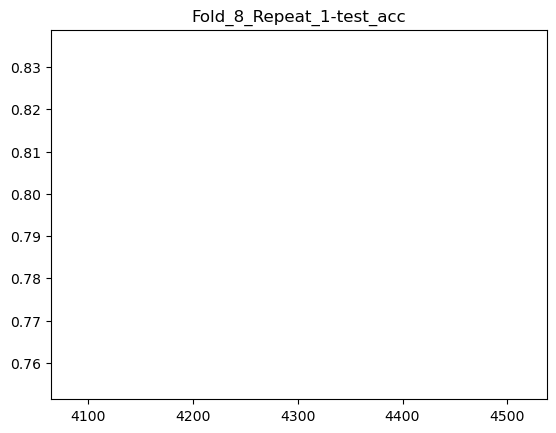

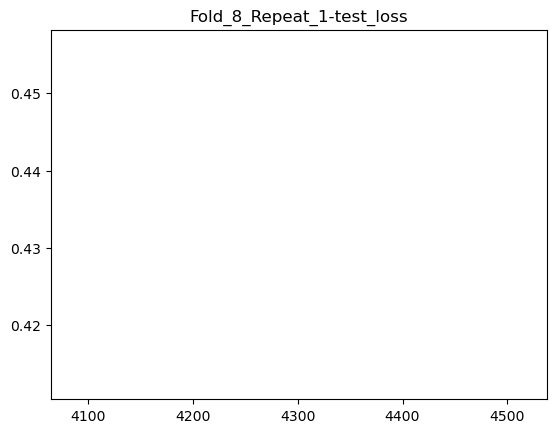

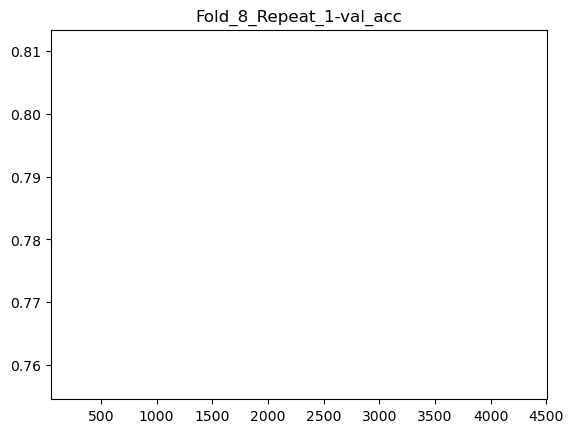

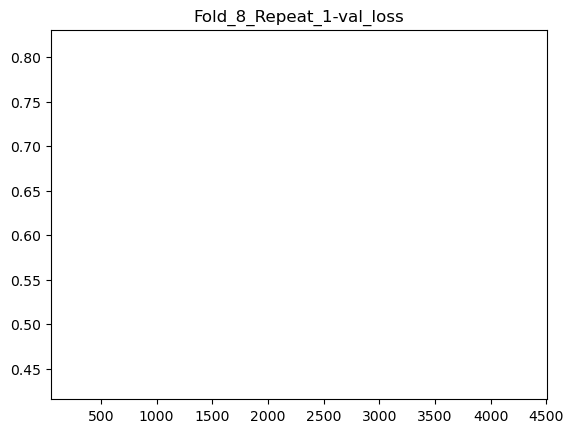

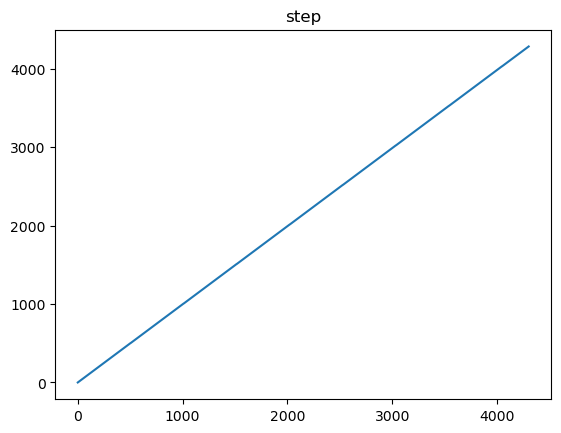

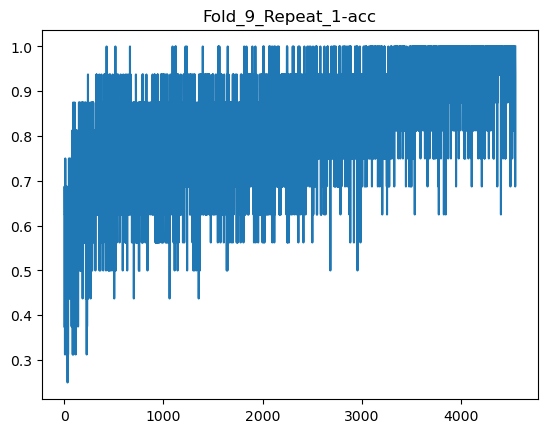

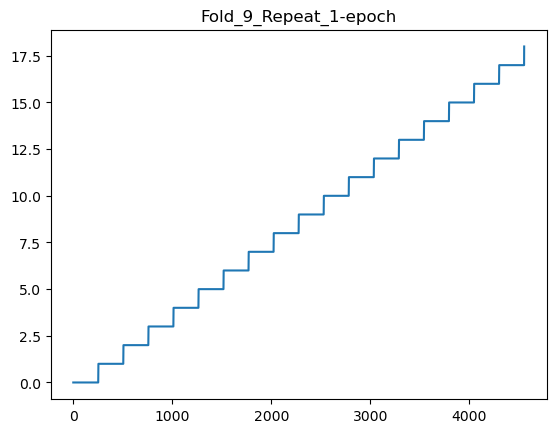

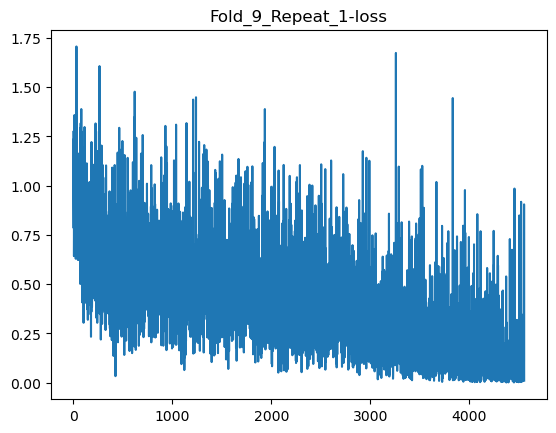

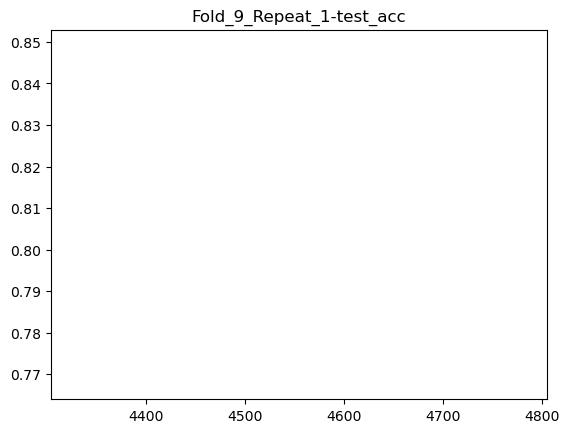

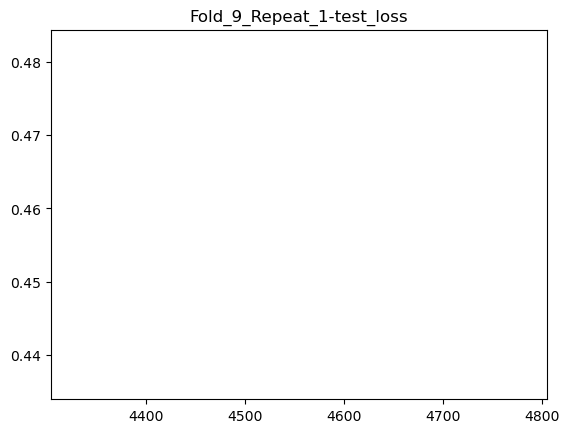

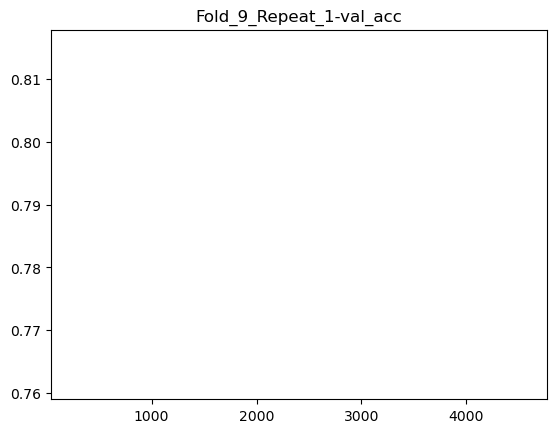

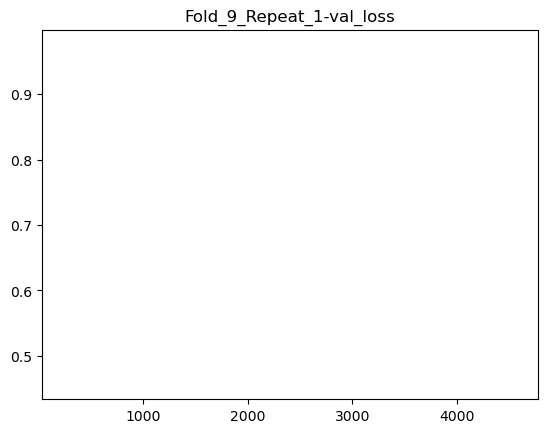

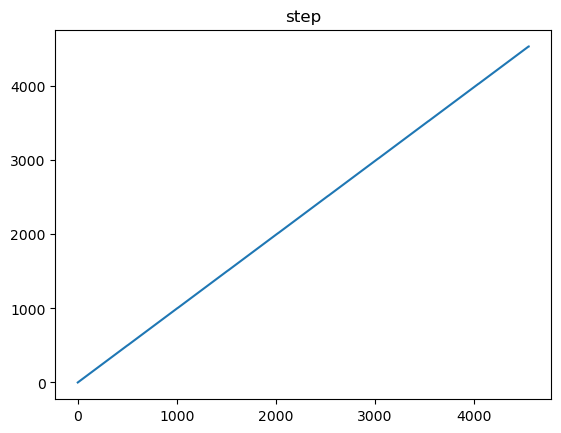

In [12]:
for df in all_data:
    for col in df.columns:
        df[col].plot(title=col)
        plt.show()

In [13]:
test_accs = []
test_losses = []

for df in all_data:
    test_accs += [df[col].iloc[-1] for col in df.columns if "test_acc" in col]
    test_losses += [df[col].iloc[-1] for col in df.columns if "test_loss" in col]



In [14]:
test_accs

[0.8062360882759094,
 0.7995545864105225,
 0.8173719644546509,
 0.8440979719161987,
 0.795100212097168,
 0.8240534663200378,
 0.8262805938720703,
 0.7795100212097168,
 0.8240534663200378,
 0.788418710231781,
 0.7973273992538452,
 0.7906458973884583,
 0.8084632754325867,
 0.8195990920066833,
 0.8106904029846191,
 0.8062360882759094,
 0.8173719644546509,
 0.781737208366394,
 0.8262805938720703,
 0.795100212097168,
 0.8084632754325867]

In [74]:
all_data[11].info()
all_data[11]["Fold_0_Repeat_1-test_acc"].iloc[-1]


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10241 entries, 0 to 10240
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Fold_0_Repeat_1-acc        10230 non-null  float64
 1   Fold_0_Repeat_1-epoch      10241 non-null  int64  
 2   Fold_0_Repeat_1-loss       10230 non-null  float64
 3   Fold_0_Repeat_1-test_acc   1 non-null      float64
 4   Fold_0_Repeat_1-test_loss  1 non-null      float64
 5   Fold_0_Repeat_1-val_acc    10 non-null     float64
 6   Fold_0_Repeat_1-val_loss   10 non-null     float64
 7   step                       10241 non-null  int64  
dtypes: float64(6), int64(2)
memory usage: 640.2 KB


0.7239583134651184

In [80]:
all_data[15].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10251 entries, 0 to 10250
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Fold_4_Repeat_1-acc        10240 non-null  float64
 1   Fold_4_Repeat_1-epoch      10251 non-null  int64  
 2   Fold_4_Repeat_1-loss       10240 non-null  float64
 3   Fold_4_Repeat_1-test_acc   1 non-null      float64
 4   Fold_4_Repeat_1-test_loss  1 non-null      float64
 5   Fold_4_Repeat_1-val_acc    10 non-null     float64
 6   Fold_4_Repeat_1-val_loss   10 non-null     float64
 7   step                       10251 non-null  int64  
dtypes: float64(6), int64(2)
memory usage: 640.8 KB
